# The exploratory analysis of public attitudes towards Google and Microsoft from the perspective of social media (Twitter)

# Table of Content  

[Approach breakdown](#2)  
> [The method of selecting important time points](#2.1)  

[Data Description section](#3)  
  
[Analysis section](#4)  
> [Data preprocessing](#4.1)  
  [Sentiment Analysis](#4.2)  
  [Topic Modeling](#4.3)  
  [Topic Over Time](#4.4)   
  [Wordcloud](#4.5)  
  [Tweets in order of Prevalence index](#4.6)  
  

 More detailed process of descriptive analysis will be presented in the report

These data sets will be used:  

OpenAI_Keyword:  
data_2023-03-02_2023-03-07.csv  
data_2023-03-07_2023-03-12.csv  
data_2023-03-12_2023-03-17.csv  
data_2023-03-17_2023-03-22.csv  
data_2023-03-22_2023-03-27.csv  
data_2023-03-27_2023-03-31.csv  

Google_Keyword:  
google_data_2023-03-07_2023-03-12.csv  
google_data_2023-03-12_2023-03-17.csv  
google_data_2023-03-17_2023-03-22.csv  
google_data_2023-03-22_2023-03-27.csv  
google_data_2023-03-27_2023-03-31.csv  

Microsoft_Keyword:  
ms_data_2023-03-07_2023-03-12.csv  
ms_data_2023-03-12_2023-03-17.csv  
ms_data_2023-03-17_2023-03-22.csv  
ms_data_2023-03-22_2023-03-27.csv  
ms_data_2023-03-27_2023-03-31.csv  

# Approach breakdown <a class="anchor" id="2"></a>

## The method of selecting important time points <a class="anchor" id="2.1"></a>

In [1]:
# Import necessary libraries
import re
import nltk
import emoji
import string
import gensim
import pyLDAvis
import numpy as np
import pandas as pd
import seaborn as sns
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models
from langdetect import detect
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import TfidfVectorizer

#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Load data into pandas dataframes
OP_1 = pd.read_csv("./Coursework II data/OpenAI_Keyword/data_2023-03-02_2023-03-07.csv")
OP_2 = pd.read_csv("./Coursework II data/OpenAI_Keyword/data_2023-03-07_2023-03-12.csv")
OP_3 = pd.read_csv("./Coursework II data/OpenAI_Keyword/data_2023-03-12_2023-03-17.csv")
OP_4 = pd.read_csv("./Coursework II data/OpenAI_Keyword/data_2023-03-17_2023-03-22.csv")
OP_5 = pd.read_csv("./Coursework II data/OpenAI_Keyword/data_2023-03-22_2023-03-27.csv")
OP_6 = pd.read_csv("./Coursework II data/OpenAI_Keyword/data_2023-03-27_2023-03-31.csv")


In [3]:
OP_1.head(5)


,date,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
0,2023-03-02 23:59:30+00:00,https://twitter.com/infomercadoperu/status/163...,#TENDENCIAS | El empresario tiene pensado prep...,#TENDENCIAS | El empresario tiene pensado prep...,1631444150120792065,https://twitter.com/infomercadoperu,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,['TENDENCIAS'],NaN,"SummaryCard(title='Elon Musk sobre la IA: ""Me ...",11.0,NaN
1,2023-03-02 23:58:14+00:00,https://twitter.com/Ben_Ccarter/status/1631443...,"The average American will eat 35,000 cookies d...","The average American will eat 35,000 cookies d...",1631443831617904642,https://twitter.com/Ben_Ccarter,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,['Openai'],NaN,NaN,1.0,NaN
2,2023-03-02 23:57:18+00:00,https://twitter.com/cyoon_dev/status/163144359...,You can now connect your app with the #OpenAI ...,You can now connect your app with the #OpenAI ...,1631443596963454977,https://twitter.com/cyoon_dev,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,"['OpenAI', 'ChatGPT']",NaN,NaN,67.0,NaN
3,2023-03-02 23:57:05+00:00,https://twitter.com/roronoajp/status/163144354...,最高ですやん\nさわりまくろー\n\n#BTC \n\nChatGPT、アプリに組み込みやす...,最高ですやん\nさわりまくろー\n\n#BTC \n\nChatGPT、アプリに組み込みやす...,1631443540965470208,https://twitter.com/roronoajp,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,['BTC'],NaN,SummaryCard(title='ChatGPT、アプリに組み込みやすく\u3000Op...,34.0,NaN
4,2023-03-02 23:56:54+00:00,https://twitter.com/Shani_aka_Ace/status/16314...,The first song on my new album 'History' trans...,The first song on my new album 'History' trans...,1631443494899204099,https://twitter.com/Shani_aka_Ace,1,0,5,0,...,NaN,NaN,NaN,NaN,NaN,"['Hiphop', 'Dnb', 'Rock', 'Rap', 'Drumandbass'...",NaN,"PlayerCard(title='Y2k22 (Album Version)', url=...",69.0,NaN


In [4]:
OP_1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22500 entries, 0 to 22499
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              22500 non-null  object 
 1   url               22500 non-null  object 
 2   rawContent        22500 non-null  object 
 3   renderedContent   22500 non-null  object 
 4   id                22500 non-null  int64  
 5   user              22500 non-null  object 
 6   replyCount        22500 non-null  int64  
 7   retweetCount      22500 non-null  int64  
 8   likeCount         22500 non-null  int64  
 9   quoteCount        22500 non-null  int64  
 10  conversationId    22500 non-null  int64  
 11  lang              22500 non-null  object 
 12  source            22500 non-null  object 
 13  sourceUrl         22500 non-null  object 
 14  sourceLabel       22500 non-null  object 
 15  links             8335 non-null   object 
 16  media             4659 non-null   object

In [5]:
OP_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19724 entries, 0 to 19723
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              19724 non-null  object 
 1   url               19724 non-null  object 
 2   rawContent        19724 non-null  object 
 3   renderedContent   19724 non-null  object 
 4   id                19724 non-null  int64  
 5   user              19724 non-null  object 
 6   replyCount        19724 non-null  int64  
 7   retweetCount      19724 non-null  int64  
 8   likeCount         19724 non-null  int64  
 9   quoteCount        19724 non-null  int64  
 10  conversationId    19724 non-null  int64  
 11  lang              19724 non-null  object 
 12  source            19724 non-null  object 
 13  sourceUrl         19724 non-null  object 
 14  sourceLabel       19724 non-null  object 
 15  links             8130 non-null   object 
 16  media             4223 non-null   object

In [6]:
OP_2.hashtags.value_counts(dropna=False).to_frame()


,count
hashtags,
NaN,12232
['Openai'],816
['ChatGPT'],252
['OpenAI'],124
"['ChatGPT', 'OpenAI']",91
...,...
['out'],1
['HeyGoogle'],1
"['LowCode', 'OpenAI', 'PowerPlatform', 'AIBuilder']",1


In [7]:
combined_OP = pd.concat([OP_1, OP_2, OP_3, OP_4, OP_5, OP_6], ignore_index=True)

# reset the index
combined_OP = combined_OP.reset_index(drop=True)


In [8]:
combined_OP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205380 entries, 0 to 205379
Data columns (total 29 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              205380 non-null  object 
 1   url               205380 non-null  object 
 2   rawContent        205380 non-null  object 
 3   renderedContent   205380 non-null  object 
 4   id                205380 non-null  int64  
 5   user              205380 non-null  object 
 6   replyCount        205380 non-null  int64  
 7   retweetCount      205380 non-null  int64  
 8   likeCount         205380 non-null  int64  
 9   quoteCount        205380 non-null  int64  
 10  conversationId    205380 non-null  int64  
 11  lang              205380 non-null  object 
 12  source            205380 non-null  object 
 13  sourceUrl         205380 non-null  object 
 14  sourceLabel       205380 non-null  object 
 15  links             72328 non-null   object 
 16  media             41

In [9]:
# select only the desired columns
selected_columns = ['date', 'rawContent', 'user', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount']
data_OP = combined_OP.loc[:, selected_columns]


In [10]:
# display the new data frame
data_OP.head()


,date,rawContent,user,replyCount,retweetCount,likeCount,quoteCount
0,2023-03-02 23:59:30+00:00,#TENDENCIAS | El empresario tiene pensado prep...,https://twitter.com/infomercadoperu,0,0,0,0
1,2023-03-02 23:58:14+00:00,"The average American will eat 35,000 cookies d...",https://twitter.com/Ben_Ccarter,0,0,0,0
2,2023-03-02 23:57:18+00:00,You can now connect your app with the #OpenAI ...,https://twitter.com/cyoon_dev,0,0,1,0
3,2023-03-02 23:57:05+00:00,最高ですやん\nさわりまくろー\n\n#BTC \n\nChatGPT、アプリに組み込みやす...,https://twitter.com/roronoajp,0,0,0,0
4,2023-03-02 23:56:54+00:00,The first song on my new album 'History' trans...,https://twitter.com/Shani_aka_Ace,1,0,5,0


In [11]:
data_OP.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205380 entries, 0 to 205379
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          205380 non-null  object
 1   rawContent    205380 non-null  object
 2   user          205380 non-null  object
 3   replyCount    205380 non-null  int64 
 4   retweetCount  205380 non-null  int64 
 5   likeCount     205380 non-null  int64 
 6   quoteCount    205380 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 11.0+ MB


In [12]:
# Convert the date to the date time format of Pandas
data_OP['date'] = pd.to_datetime(data_OP['date'])

# Sort by date
data_OP = data_OP.sort_values(by='date')


In [13]:
week_counts = data_OP.resample('W', on='date').sum()


In [14]:
day_counts = data_OP.resample('D', on='date').sum()


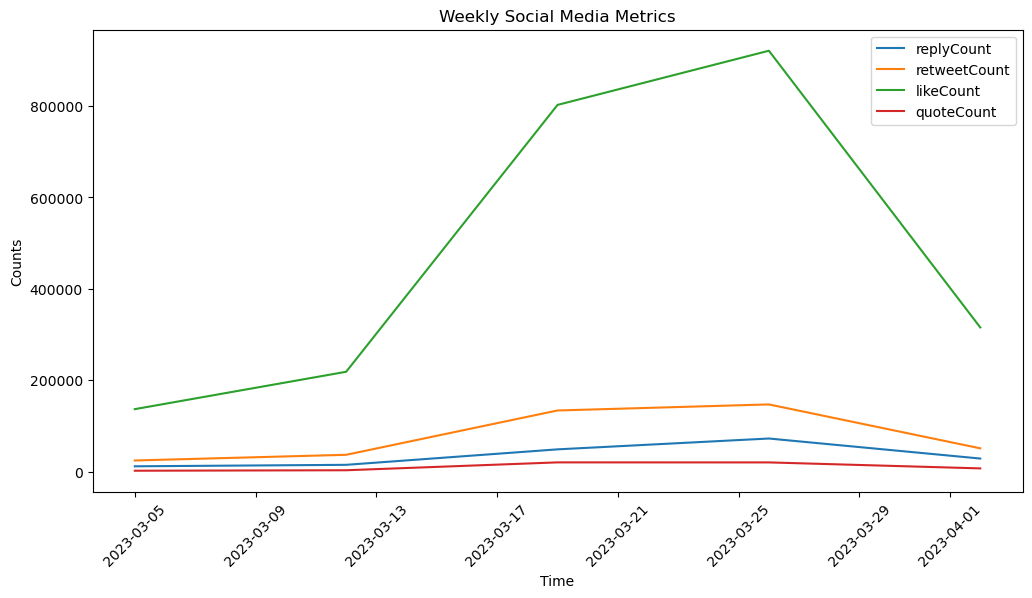

In [15]:
plt.figure(figsize=(12,6))

# Plot a time series
plt.plot(week_counts.index, week_counts['replyCount'], label='replyCount')
plt.plot(week_counts.index, week_counts['retweetCount'], label='retweetCount')
plt.plot(week_counts.index, week_counts['likeCount'], label='likeCount')
plt.plot(week_counts.index, week_counts['quoteCount'], label='quoteCount')

plt.title('Weekly Social Media Metrics')
plt.xlabel('Time')
plt.ylabel('Counts')

plt.xticks(rotation=45)
plt.legend()

plt.show()


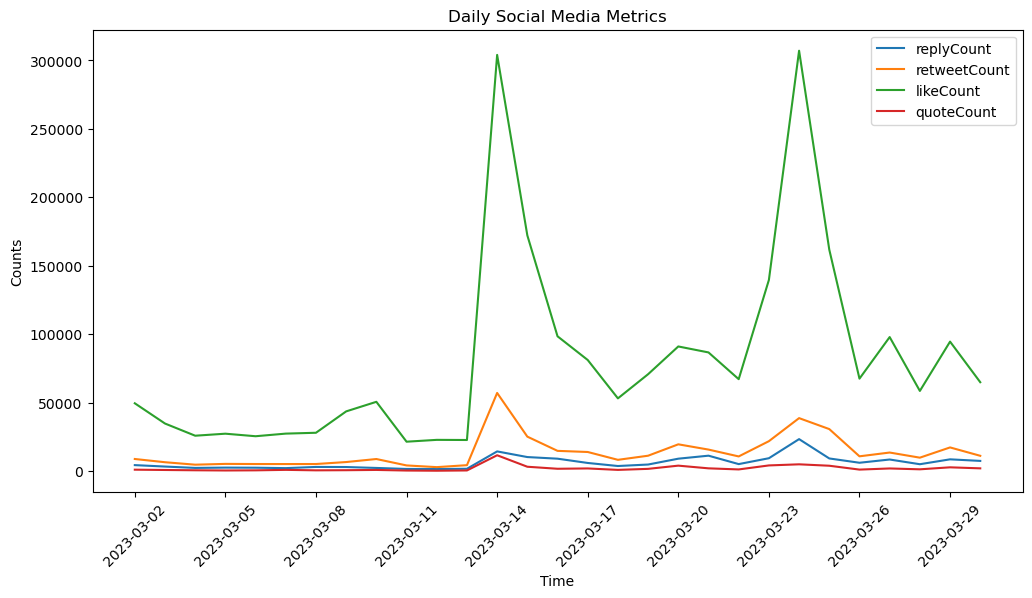

In [16]:
plt.figure(figsize=(12,6))

# Plot a time series
plt.plot(day_counts.index, day_counts['replyCount'], label='replyCount')
plt.plot(day_counts.index, day_counts['retweetCount'], label='retweetCount')
plt.plot(day_counts.index, day_counts['likeCount'], label='likeCount')
plt.plot(day_counts.index, day_counts['quoteCount'], label='quoteCount')

plt.title('Daily Social Media Metrics')
plt.xlabel('Time')
plt.ylabel('Counts')

plt.xticks(rotation=45)
plt.xticks(day_counts.index[::3])
plt.legend()

plt.show()


In [17]:
# Find out which tweets get the most likeCount
max_like_idx = data_OP['likeCount'].idxmax()
max_like_rawContent = data_OP.loc[max_like_idx, 'rawContent']
print(max_like_rawContent)


As part of their investment, Microsoft gained exclusive access to the entire OpenAI codebase


In [18]:
# Find out which tweets get the top likeCount
top_5 = data_OP.sort_values(by='likeCount', ascending=False).head(5)
top_5


,date,rawContent,user,replyCount,retweetCount,likeCount,quoteCount
153439,2023-03-24 05:34:31+00:00,"As part of their investment, Microsoft gained ...",https://twitter.com/elonmusk,10955,17431,147969,1717
58964,2023-03-14 17:00:33+00:00,"Announcing GPT-4, a large multimodal model, wi...",https://twitter.com/OpenAI,2256,18543,66903,5340
70198,2023-03-15 11:55:39+00:00,Whenever you call Sam Altman to ask why OpenAI...,https://twitter.com/Carnage4Life,480,3283,44169,203
160168,2023-03-25 13:30:02+00:00,OpenAI released plugins for ChatGPT.\n\nIt wil...,https://twitter.com/thealexbanks,462,4880,27149,407
109639,2023-03-19 00:10:06+00:00,OpenAI is hiring a Killswitch Engineer for GPT...,https://twitter.com/SmokeAwayyy,536,3804,26896,752


In [19]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
print(top_5.rawContent.values)


['As part of their investment, Microsoft gained exclusive access to the entire OpenAI codebase'
 'Announcing GPT-4, a large multimodal model, with our best-ever results on capabilities and alignment: https://t.co/TwLFssyALF https://t.co/lYWwPjZbSg'
 'Whenever you call Sam Altman to ask why OpenAI is no longer a non-profit or even “open” https://t.co/TxMXR2Cf2d'
 "OpenAI released plugins for ChatGPT.\n\nIt will change the future of humanity.\n\nHere's how they work and why this is so important: https://t.co/0WvNLStqLV"
 'OpenAI is hiring a Killswitch Engineer for GPT-5.\n\nApply now. https://t.co/sAO7hbvmVa']


## For the top two tweets, these two users(elonmusk, OpenAI) and their posts can be considered as official news and have had a significant impact, they were selected as important time points for further analysis.

In [20]:
GO_1 = pd.read_csv("./Coursework II data/Google_Keyword/google_data_2023-03-07_2023-03-12.csv")
GO_2 = pd.read_csv("./Coursework II data/Google_Keyword/google_data_2023-03-12_2023-03-17.csv")
GO_3 = pd.read_csv("./Coursework II data/Google_Keyword/google_data_2023-03-17_2023-03-22.csv")
GO_4 = pd.read_csv("./Coursework II data/Google_Keyword/google_data_2023-03-22_2023-03-27.csv")
GO_5 = pd.read_csv("./Coursework II data/Google_Keyword/google_data_2023-03-27_2023-03-31.csv")


In [21]:
MI_1 = pd.read_csv("./Coursework II data/Microsoft_Keyword/ms_data_2023-03-07_2023-03-12.csv")
MI_2 = pd.read_csv("./Coursework II data/Microsoft_Keyword/ms_data_2023-03-12_2023-03-17.csv")
MI_3 = pd.read_csv("./Coursework II data/Microsoft_Keyword/ms_data_2023-03-17_2023-03-22.csv")
MI_4 = pd.read_csv("./Coursework II data/Microsoft_Keyword/ms_data_2023-03-22_2023-03-27.csv")
MI_5 = pd.read_csv("./Coursework II data/Microsoft_Keyword/ms_data_2023-03-27_2023-03-31.csv")


In [22]:
combined_GO = pd.concat([GO_1, GO_2, GO_3, GO_4, GO_5], ignore_index=True)
combined_GO = combined_GO.reset_index(drop=True)


In [23]:
combined_MI = pd.concat([MI_1, MI_2, MI_3, MI_4, MI_5], ignore_index=True)
combined_MI = combined_MI.reset_index(drop=True)


In [24]:
# select only the desired columns
selected_columns = ['date', 'rawContent', 'user', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount']
data_GO = combined_GO.loc[:, selected_columns]
data_MI = combined_MI.loc[:, selected_columns]


In [25]:
data_GO.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059953 entries, 0 to 2059952
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   rawContent    object 
 2   user          object 
 3   replyCount    float64
 4   retweetCount  float64
 5   likeCount     object 
 6   quoteCount    object 
dtypes: float64(2), object(5)
memory usage: 110.0+ MB


In [26]:
data_MI.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382977 entries, 0 to 382976
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   date          382977 non-null  object
 1   rawContent    382977 non-null  object
 2   user          382977 non-null  object
 3   replyCount    382977 non-null  int64 
 4   retweetCount  382977 non-null  int64 
 5   likeCount     382977 non-null  int64 
 6   quoteCount    382977 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 20.5+ MB


In [27]:
data_GO = data_GO.dropna().drop_duplicates()
data_MI = data_MI.dropna().drop_duplicates()


In [28]:
# Converts a string to a date-time format
data_GO['date'] = pd.to_datetime(data_GO['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

# Remove rows that failed to be converted
data_GO.dropna(subset=['date'], inplace=True)

# transform replyCount、retweetCount、likeCount、quoteCount type
data_GO['rawContent'] = data_GO['rawContent'].astype(str)
data_GO['replyCount'] = data_GO['replyCount'].astype(int)
data_GO['retweetCount'] = data_GO['retweetCount'].astype(int)
data_GO['likeCount'] = data_GO['likeCount'].astype(int)
data_GO['quoteCount'] = data_GO['quoteCount'].astype(int)


In [29]:
data_GO.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1640871 entries, 0 to 2059952
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype              
---  ------        --------------    -----              
 0   date          1640871 non-null  datetime64[ns, UTC]
 1   rawContent    1640871 non-null  object             
 2   user          1640871 non-null  object             
 3   replyCount    1640871 non-null  int64              
 4   retweetCount  1640871 non-null  int64              
 5   likeCount     1640871 non-null  int64              
 6   quoteCount    1640871 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 100.2+ MB


In [30]:
# Converts a string to a date-time format
data_MI['date'] = pd.to_datetime(data_MI['date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')

# Remove rows that failed to be converted
data_MI.dropna(subset=['date'], inplace=True)

# transform replyCount、retweetCount、likeCount、quoteCount type
data_MI['rawContent'] = data_MI['rawContent'].astype(str)
data_MI['replyCount'] = data_MI['replyCount'].astype(int)
data_MI['retweetCount'] = data_MI['retweetCount'].astype(int)
data_MI['likeCount'] = data_MI['likeCount'].astype(int)
data_MI['quoteCount'] = data_MI['quoteCount'].astype(int)


In [31]:
data_MI.info()


<class 'pandas.core.frame.DataFrame'>
Index: 382968 entries, 0 to 382976
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   date          382968 non-null  datetime64[ns, UTC]
 1   rawContent    382968 non-null  object             
 2   user          382968 non-null  object             
 3   replyCount    382968 non-null  int64              
 4   retweetCount  382968 non-null  int64              
 5   likeCount     382968 non-null  int64              
 6   quoteCount    382968 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(4), object(2)
memory usage: 23.4+ MB


# Data Description section <a class="anchor" id="3"></a>

In [32]:
data_GO_1 = data_GO[(data_GO['date'] >= '2023-03-09') & (data_GO['date'] <= '2023-03-19')]
data_GO_2 = data_GO[(data_GO['date'] >= '2023-03-19') & (data_GO['date'] <= '2023-03-29')]

data_GO_1 = data_GO_1.sort_values(by='date')
data_GO_1_before = data_GO_1[data_GO_1['date'] < '2023-03-14 17:00:33+00:00']
data_GO_1_after = data_GO_1[data_GO_1['date'] >= '2023-03-14 17:00:33+00:00']

data_GO_2 = data_GO_2.sort_values(by='date')
data_GO_2_before = data_GO_2[data_GO_2['date'] < '2023-03-24 05:34:31+00:00']
data_GO_2_after = data_GO_2[data_GO_2['date'] >= '2023-03-24 05:34:31+00:00']



In [33]:
data_GO_1_before_tweet_count = data_GO_1_before.shape[0]
data_GO_1_before_user_count = data_GO_1_before['user'].nunique()

data_GO_1_after_tweet_count = data_GO_1_after.shape[0]
data_GO_1_after_user_count = data_GO_1_after['user'].nunique()

print("The number of tweets before 2023-03-14 17:00:33 is:", data_GO_1_before_tweet_count, "and after is:", data_GO_1_after_tweet_count)
print("The number of unique users before 2023-03-14 17:00:33 is:", data_GO_1_before_user_count, "and after is:", data_GO_1_after_user_count)



The number of tweets before 2023-03-14 17:00:33 is: 368025 and after is: 298442
The number of unique users before 2023-03-14 17:00:33 is: 273936 and after is: 225733


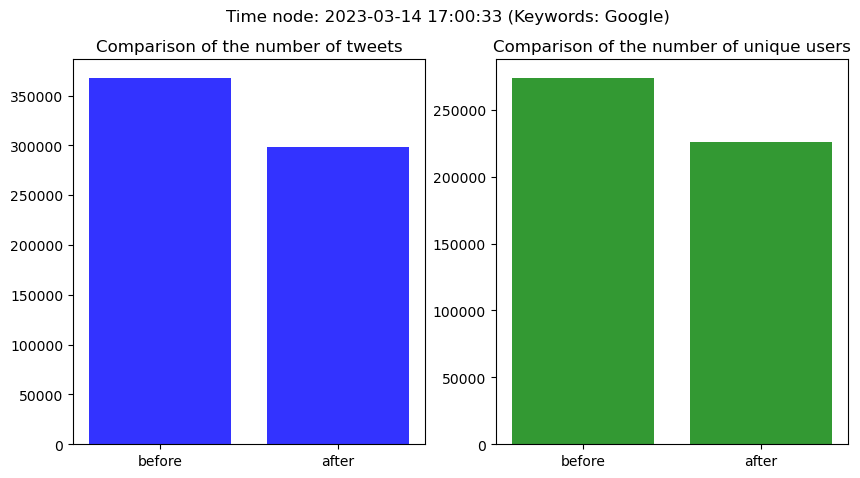

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Comparison of the number of tweets')
axs[0].bar(['before', 'after'], [data_GO_1_before_tweet_count, data_GO_1_after_tweet_count], alpha=0.8, color='blue')

axs[1].set_title('Comparison of the number of unique users')
axs[1].bar(['before', 'after'], [data_GO_1_before_user_count, data_GO_1_after_user_count], alpha=0.8, color='green')

fig.suptitle('Time node: 2023-03-14 17:00:33 (Keywords: Google)')

plt.show()


In [35]:
data_MI_1 = data_MI[(data_MI['date'] >= '2023-03-09') & (data_MI['date'] <= '2023-03-19')]
data_MI_2 = data_MI[(data_MI['date'] >= '2023-03-19') & (data_MI['date'] <= '2023-03-29')]

data_MI_1 = data_MI_1.sort_values(by='date')
data_MI_1_before = data_MI_1[data_MI_1['date'] < '2023-03-14 17:00:33+00:00']
data_MI_1_after = data_MI_1[data_MI_1['date'] >= '2023-03-14 17:00:33+00:00']

data_MI_2 = data_MI_2.sort_values(by='date')
data_MI_2_before = data_MI_2[data_MI_2['date'] < '2023-03-24 05:34:31+00:00']
data_MI_2_after = data_MI_2[data_MI_2['date'] >= '2023-03-24 05:34:31+00:00']



In [36]:
data_MI_1_before_tweet_count = data_MI_1_before.shape[0]
data_MI_1_before_user_count = data_MI_1_before['user'].nunique()

data_MI_1_after_tweet_count = data_MI_1_after.shape[0]
data_MI_1_after_user_count = data_MI_1_after['user'].nunique()

print("The number of tweets before 2023-03-14 17:00:33 is:", data_MI_1_before_tweet_count, "and after is:", data_MI_1_after_tweet_count)
print("The number of unique users before 2023-03-14 17:00:33 is:", data_MI_1_before_user_count, "and after is:", data_MI_1_after_user_count)



The number of tweets before 2023-03-14 17:00:33 is: 74100 and after is: 82697
The number of unique users before 2023-03-14 17:00:33 is: 44547 and after is: 51079


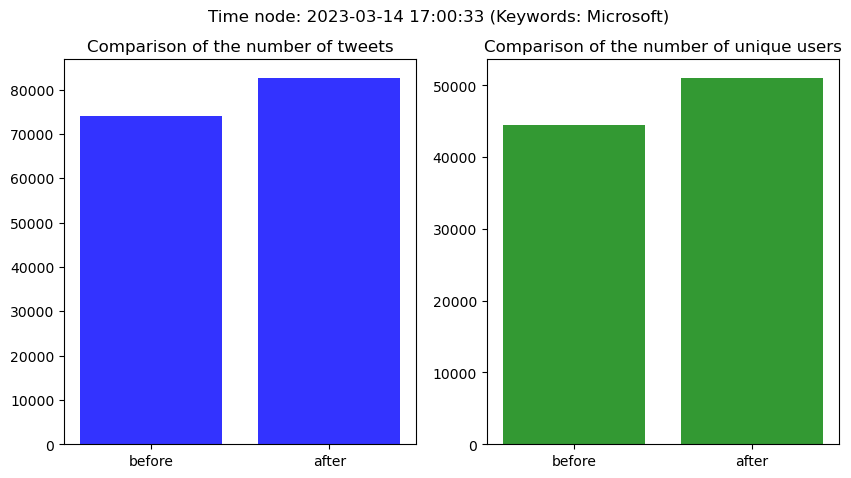

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Comparison of the number of tweets')
axs[0].bar(['before', 'after'], [data_MI_1_before_tweet_count, data_MI_1_after_tweet_count], alpha=0.8, color='blue')

axs[1].set_title('Comparison of the number of unique users')
axs[1].bar(['before', 'after'], [data_MI_1_before_user_count, data_MI_1_after_user_count], alpha=0.8, color='green')

fig.suptitle('Time node: 2023-03-14 17:00:33 (Keywords: Microsoft)')

plt.show()



In [38]:
data_GO_2_before_tweet_count = data_GO_2_before.shape[0]
data_GO_2_before_user_count = data_GO_2_before['user'].nunique()

data_GO_2_after_tweet_count = data_GO_2_after.shape[0]
data_GO_2_after_user_count = data_GO_2_after['user'].nunique()

print("The number of tweets before 2023-03-24 05:34:31 is:", data_GO_2_before_tweet_count, "and after is:", data_GO_2_after_tweet_count)
print("The number of unique users before 2023-03-24 05:34:31 is:", data_GO_2_before_user_count, "and after is:", data_GO_2_after_user_count)


The number of tweets before 2023-03-24 05:34:31 is: 367010 and after is: 317498
The number of unique users before 2023-03-24 05:34:31 is: 270898 and after is: 240863


Text(0.5, 0.98, 'Time node: 2023-03-24 05:34:31 (Keywords: Google)')

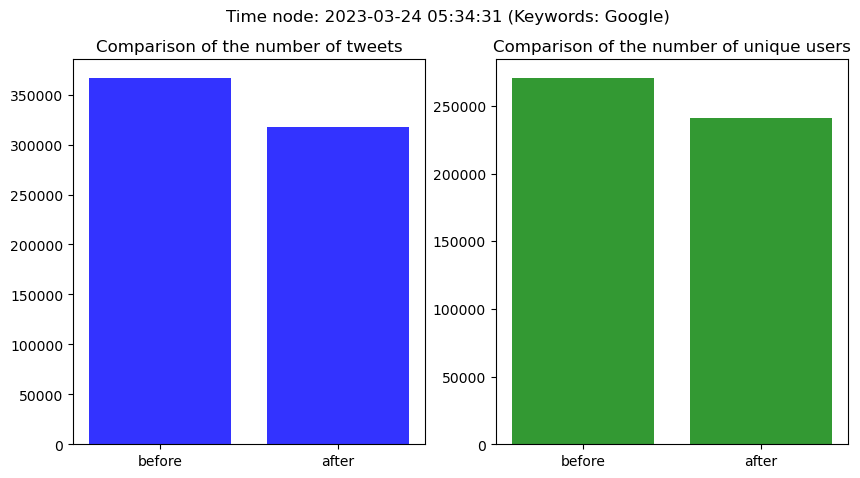

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Comparison of the number of tweets')
axs[0].bar(['before', 'after'], [data_GO_2_before_tweet_count, data_GO_2_after_tweet_count], alpha=0.8, color='blue')

axs[1].set_title('Comparison of the number of unique users')
axs[1].bar(['before', 'after'], [data_GO_2_before_user_count, data_GO_2_after_user_count], alpha=0.8, color='green')

fig.suptitle('Time node: 2023-03-24 05:34:31 (Keywords: Google)')



In [40]:
data_MI_2_before_tweet_count = data_MI_2_before.shape[0]
data_MI_2_before_user_count = data_MI_2_before['user'].nunique()

data_MI_2_after_tweet_count = data_MI_2_after.shape[0]
data_MI_2_after_user_count = data_MI_2_after['user'].nunique()

print("The number of tweets before 2023-03-24 05:34:31 is:", data_MI_2_before_tweet_count, "and after is:", data_MI_2_after_tweet_count)
print("The number of unique users before 2023-03-24 05:34:31 is:", data_MI_2_before_user_count, "and after is:", data_MI_2_after_user_count)



The number of tweets before 2023-03-24 05:34:31 is: 81023 and after is: 79101
The number of unique users before 2023-03-24 05:34:31 is: 50213 and after is: 45784


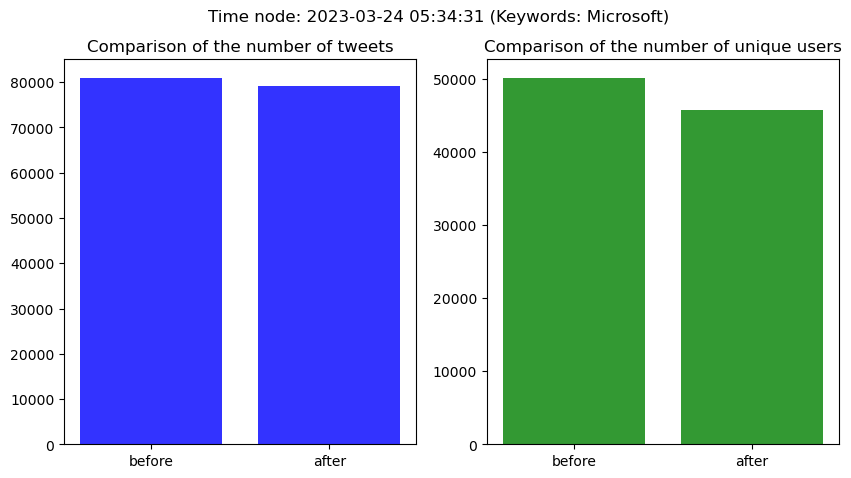

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Comparison of the number of tweets')
axs[0].bar(['before', 'after'], [data_MI_2_before_tweet_count, data_MI_2_after_tweet_count], alpha=0.8, color='blue')

axs[1].set_title('Comparison of the number of unique users')
axs[1].bar(['before', 'after'], [data_MI_2_before_user_count, data_MI_2_after_user_count], alpha=0.8, color='green')

fig.suptitle('Time node: 2023-03-24 05:34:31 (Keywords: Microsoft)')

plt.show()



# Analysis section <a class="anchor" id="4"></a>

## Data preprocessing <a class="anchor" id="4.1"></a>

In [42]:
from langdetect import detect

# define a function to detect the language of a text string
def detect_language(text):
    try:
        return detect(text)
    except:
        return None


In [43]:
# detect the language of each rawContent and filter out non-English tweets
data_GO = data_GO[data_GO['rawContent'].apply(lambda x: detect_language(x)) == 'en']


In [44]:
data_MI = data_MI[data_MI['rawContent'].apply(lambda x: detect_language(x)) == 'en']


In [45]:
def preprocess_text(text):
    # Convert the text to lowercase
    text = str(text).lower()
    
    # Remove the '\n'
    text = text.replace('\n', '')
    
    # Delete URL
    url_regex = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = re.sub(url_regex, '', text)
    
    # Remove special characters such as @ and #
    text = re.sub(r'[@#]\S+', '', text)
    
    # Remove all punctuation, special symbols, and numbers
    text = re.sub('[%s%s]' % (re.escape(string.punctuation), re.escape(string.digits)), '', text)
     
    return text


In [46]:
def remove_emoji(text):
    #remove emoji in the text
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)


In [47]:
def preprocess_final(data):
    # Tokenization
    data['tokenized'] = data['remove_emoji'].apply(word_tokenize)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    stop_words.add('google')
    stop_words.add('microsoft')
    data['filtered'] = data['tokenized'].apply(lambda x: [word for word in x if word.lower() not in stop_words])
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    data['lemmatized'] = data['filtered'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    return data


In [48]:
data_GO['preprocess_text'] = data_GO['rawContent'].apply(preprocess_text)
data_GO['remove_emoji'] = data_GO['preprocess_text'].apply(remove_emoji)
data_GO = data_GO[data_GO['remove_emoji'].apply(lambda x: len(x) > 10)]
data_GO = data_GO[data_GO['remove_emoji'] != '']
data_GO = data_GO.dropna().drop_duplicates()
data_GO = preprocess_final(data_GO)


In [49]:
data_MI['preprocess_text'] = data_MI['rawContent'].apply(preprocess_text)
data_MI['remove_emoji'] = data_MI['preprocess_text'].apply(remove_emoji)
data_MI = data_MI[data_MI['remove_emoji'].apply(lambda x: len(x) > 10)]
data_MI = data_MI[data_MI['remove_emoji'] != ''] 
data_MI = data_MI.dropna().drop_duplicates()
data_MI = preprocess_final(data_MI)


In [50]:
data_GO


,date,rawContent,user,replyCount,retweetCount,likeCount,quoteCount,preprocess_text,remove_emoji,tokenized,filtered,lemmatized
0,2023-03-07 23:59:59+00:00,@RobLXXIII @amuse @Ademirakis1 There are MANY....,https://twitter.com/GunarsLacisLV,1.0,0.0,0.0,0.0,there are manygoogle makes it easy to find ...,there are manygoogle makes it easy to find ...,"[there, are, manygoogle, makes, it, easy, to, ...","[manygoogle, makes, easy, find, plentyi, ’, go...","[manygoogle, make, easy, find, plentyi, ’, goi..."
1,2023-03-07 23:59:54+00:00,@vjeannek @Jorge_Bezos @JackPosobiec Simple go...,https://twitter.com/Elepitts1997,1.0,0.0,1.0,0.0,simple google search proves you wrong stunn...,simple google search proves you wrong stunn...,"[simple, google, search, proves, you, wrong, s...","[simple, search, proves, wrong, stunningly, be...","[simple, search, prof, wrong, stunningly, beau..."
2,2023-03-07 23:59:53+00:00,I did it! Holy crap Google was not helpful.\nW...,https://twitter.com/amydjohn,0.0,0.0,3.0,0.0,i did it holy crap google was not helpfulwhen ...,i did it holy crap google was not helpfulwhen ...,"[i, did, it, holy, crap, google, was, not, hel...","[holy, crap, helpfulwhen, doubt, keep, clicking]","[holy, crap, helpfulwhen, doubt, keep, clicking]"
3,2023-03-07 23:59:52+00:00,in the voice of a temperamental artist who jus...,https://twitter.com/marimocaptain,1.0,0.0,23.0,0.0,in the voice of a temperamental artist who jus...,in the voice of a temperamental artist who jus...,"[in, the, voice, of, a, temperamental, artist,...","[voice, temperamental, artist, overturned, tab...","[voice, temperamental, artist, overturned, tab..."
4,2023-03-07 23:59:50+00:00,@Frediculous Google Maps always gives the wors...,https://twitter.com/MuslimBrotha,1.0,0.0,3.0,0.0,google maps always gives the worst route some...,google maps always gives the worst route some...,"[google, maps, always, gives, the, worst, rout...","[maps, always, gives, worst, route, sometimes,...","[map, always, give, worst, route, sometimes, b..."
...,...,...,...,...,...,...,...,...,...,...,...,...
912898,2023-03-30 00:00:02+00:00,"Yes, but will Google discount the web sites/pa...",https://twitter.com/BigVolcano,0.0,0.0,0.0,0.0,yes but will google discount the web sitespage...,yes but will google discount the web sitespage...,"[yes, but, will, google, discount, the, web, s...","[yes, discount, web, sitespages, churned, usin...","[yes, discount, web, sitespages, churned, usin..."
912899,2023-03-30 00:00:01+00:00,Google joins the generative AI parade with new...,https://twitter.com/PortmanPartners,0.0,0.0,0.0,0.0,google joins the generative ai parade with new...,google joins the generative ai parade with new...,"[google, joins, the, generative, ai, parade, w...","[joins, generative, ai, parade, new, previews]","[join, generative, ai, parade, new, preview]"
912900,2023-03-30 00:00:01+00:00,"In #polls #MyPoint gives you more! \nVersus, ...",https://twitter.com/AppMyPoint_En,0.0,0.0,0.0,0.0,in gives you more versus yesno list and mul...,in gives you more versus yesno list and mul...,"[in, gives, you, more, versus, yesno, list, an...","[gives, versus, yesno, list, multiversusin, st...","[give, versus, yesno, list, multiversusin, sto..."
912901,2023-03-30 00:00:00+00:00,Hackers used spyware made in Spain to target u...,https://twitter.com/QS2Point,0.0,0.0,0.0,0.0,hackers used spyware made in spain to target u...,hackers used spyware made in spain to target u...,"[hackers, used, spyware, made, in, spain, to, ...","[hackers, used, spyware, made, spain, target, ...","[hacker, used, spyware, made, spain, target, u..."


In [51]:
# Select the data to be used
data_GO = data_GO.iloc[:,[0,1,11,2,3,4,5,6]]
data_GO = data_GO.rename(columns={'lemmatized': 'text'})
data_GO


,date,rawContent,text,user,replyCount,retweetCount,likeCount,quoteCount
0,2023-03-07 23:59:59+00:00,@RobLXXIII @amuse @Ademirakis1 There are MANY....,"[manygoogle, make, easy, find, plentyi, ’, goi...",https://twitter.com/GunarsLacisLV,1.0,0.0,0.0,0.0
1,2023-03-07 23:59:54+00:00,@vjeannek @Jorge_Bezos @JackPosobiec Simple go...,"[simple, search, prof, wrong, stunningly, beau...",https://twitter.com/Elepitts1997,1.0,0.0,1.0,0.0
2,2023-03-07 23:59:53+00:00,I did it! Holy crap Google was not helpful.\nW...,"[holy, crap, helpfulwhen, doubt, keep, clicking]",https://twitter.com/amydjohn,0.0,0.0,3.0,0.0
3,2023-03-07 23:59:52+00:00,in the voice of a temperamental artist who jus...,"[voice, temperamental, artist, overturned, tab...",https://twitter.com/marimocaptain,1.0,0.0,23.0,0.0
4,2023-03-07 23:59:50+00:00,@Frediculous Google Maps always gives the wors...,"[map, always, give, worst, route, sometimes, b...",https://twitter.com/MuslimBrotha,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...
912898,2023-03-30 00:00:02+00:00,"Yes, but will Google discount the web sites/pa...","[yes, discount, web, sitespages, churned, usin...",https://twitter.com/BigVolcano,0.0,0.0,0.0,0.0
912899,2023-03-30 00:00:01+00:00,Google joins the generative AI parade with new...,"[join, generative, ai, parade, new, preview]",https://twitter.com/PortmanPartners,0.0,0.0,0.0,0.0
912900,2023-03-30 00:00:01+00:00,"In #polls #MyPoint gives you more! \nVersus, ...","[give, versus, yesno, list, multiversusin, sto...",https://twitter.com/AppMyPoint_En,0.0,0.0,0.0,0.0
912901,2023-03-30 00:00:00+00:00,Hackers used spyware made in Spain to target u...,"[hacker, used, spyware, made, spain, target, u...",https://twitter.com/QS2Point,0.0,0.0,0.0,0.0


In [52]:
# Select the data to be used
data_MI = data_MI.iloc[:,[0,1,11,2,3,4,5,6]]
data_MI = data_MI.rename(columns={'lemmatized': 'text'})
data_MI


,date,rawContent,text,user,replyCount,retweetCount,likeCount,quoteCount
0,2023-03-07 23:59:47+00:00,I won the Call the Expert achievement in Micro...,"[call, expert, achievement, solitaire, collect...",https://twitter.com/Valtekken,0.0,0.0,0.0,0.0
1,2023-03-07 23:59:03+00:00,@MSNBC @MaddowBlog That’s rich coming from the...,"[’, rich, coming, national, broadcasting, comp...",https://twitter.com/bradsteaks,0.0,0.0,0.0,0.0
2,2023-03-07 23:58:55+00:00,@NextGenPlayer How the hell did Microsoft cond...,"[hell, conduct, survey, among, playstation, user]",https://twitter.com/aurigo_dust,1.0,0.0,9.0,0.0
3,2023-03-07 23:58:55+00:00,@klobrille Contraband new ip and multiplayer d...,"[contraband, new, ip, multiplayer, ’, get, wro...",https://twitter.com/No_Limit_Gamer,0.0,0.0,0.0,0.0
4,2023-03-07 23:58:45+00:00,Microsoft: I'm amazed by their strong standing...,"[im, amazed, strong, standing, tech, industry,...",https://twitter.com/khbhbd,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
273023,2023-03-30 00:00:23+00:00,How can I get the new version of Teams desktop...,"[get, new, version, team, desktop, client, dep...",https://twitter.com/sbsfaq,1.0,0.0,0.0,0.0
273024,2023-03-30 00:00:22+00:00,Microsoft this week announced the rollout of a...,"[week, announced, rollout, new, desktop, clien...",https://twitter.com/sbsfaq,1.0,0.0,0.0,0.0
273025,2023-03-30 00:00:16+00:00,@Microsoft Rolls Out Various #AI Agent Assist ...,"[roll, various, agent, assist, tool, read, lea...",https://twitter.com/LisaLisajm5,0.0,0.0,0.0,0.0
273026,2023-03-30 00:00:06+00:00,@SebastianSB If you install the Microsoft Powe...,"[install, powertoys, app, store, even, better,...",https://twitter.com/naklsonofnakkl,0.0,0.0,0.0,0.0


## Sentiment Analysis <a class="anchor" id="4.2"></a>

In [53]:
# Define a sentiment analysis function
def sentiment_analysis(text):
    '''
    sentiment analysis is performed on the text, 
    returning sentiment polarity and sentiment subjectivity
    '''
    text_str = str(text)
    blob = TextBlob(text_str)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    return sentiment_polarity, sentiment_subjectivity


In [54]:
# Run a sentiment analysis on each tweet
sentiment_scores_GO = []
for text in data_GO['text']:
    sentiment_score_GO = sentiment_analysis(text)
    sentiment_scores_GO.append(sentiment_score_GO)

# Add sentiment analysis results to the raw data table
data_GO['sentiment_polarity'] = [score[0] for score in sentiment_scores_GO]
data_GO['sentiment_subjectivity'] = [score[1] for score in sentiment_scores_GO]

# Print the sentiment analysis results
print(data_GO[['text', 'sentiment_polarity', 'sentiment_subjectivity']])


                                                     text  sentiment_polarity   
0       [manygoogle, make, easy, find, plentyi, ’, goi...            0.166667  \
1       [simple, search, prof, wrong, stunningly, beau...            0.116667   
2        [holy, crap, helpfulwhen, doubt, keep, clicking]           -0.800000   
3       [voice, temperamental, artist, overturned, tab...           -0.038095   
4       [map, always, give, worst, route, sometimes, b...           -0.007143   
...                                                   ...                 ...   
912898  [yes, discount, web, sitespages, churned, usin...            0.187500   
912899       [join, generative, ai, parade, new, preview]           -0.056818   
912900  [give, versus, yesno, list, multiversusin, sto...            0.000000   
912901  [hacker, used, spyware, made, spain, target, u...            0.000000   
912902  [team, liked, reading, experience, lemonade, s...            0.600000   

        sentiment_subjectiv

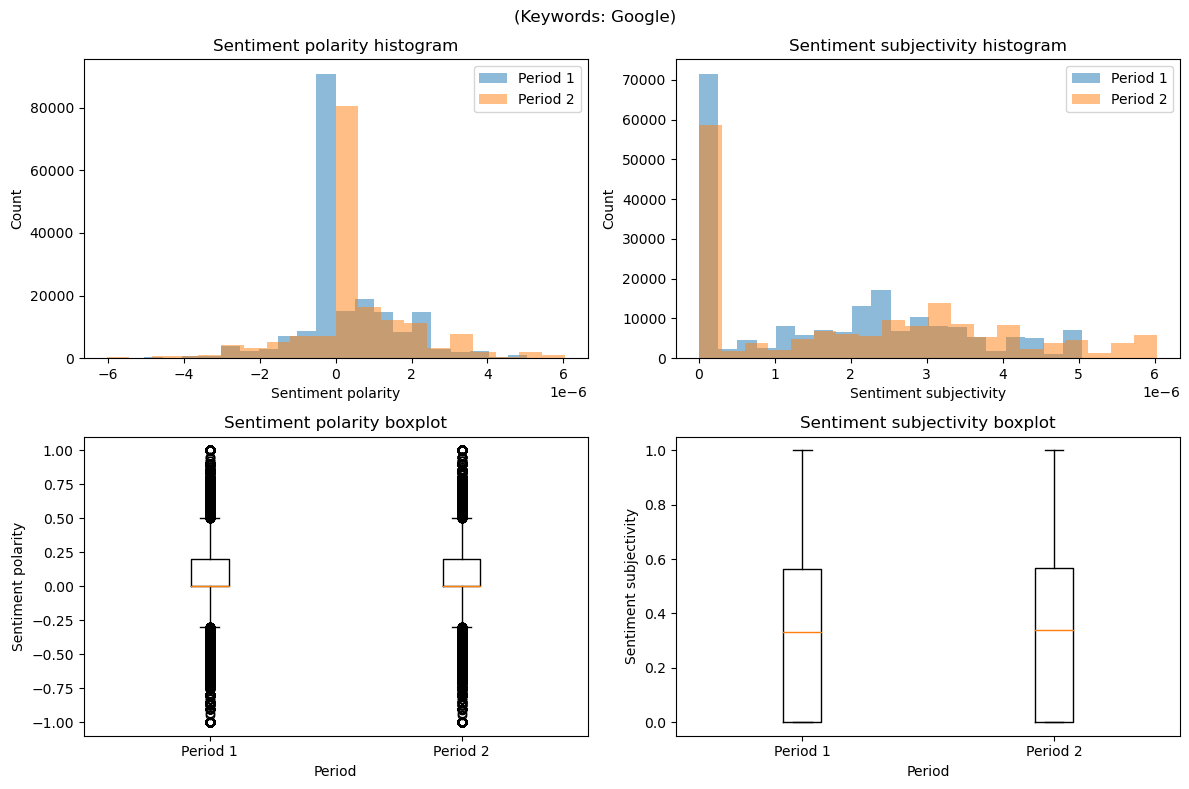

In [55]:
# Sort the data by date
data_GO.sort_values('date', inplace=True)

# Filter out the desired date range
data_GO_1 = data_GO[(data_GO['date'] >= '2023-03-09') & (data_GO['date'] <= '2023-03-19')]
data_GO_period_1 = data_GO_1[data_GO_1['date'] < '2023-03-14 17:00:33+00:00']
data_GO_period_2 = data_GO_1[data_GO_1['date'] >= '2023-03-14 17:00:33+00:00']

# Plot histograms of sentiment polarity and sentiment subjectivity
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(data_GO_period_1['sentiment_polarity']/len(data_GO_period_1), bins=20, alpha=0.5, label='Period 1')
axs[0, 0].hist(data_GO_period_2['sentiment_polarity']/len(data_GO_period_2), bins=20, alpha=0.5, label='Period 2')
axs[0, 0].legend()
axs[0, 0].set_xlabel('Sentiment polarity')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Sentiment polarity histogram')

axs[0, 1].hist(data_GO_period_1['sentiment_subjectivity']/len(data_GO_period_1), bins=20, alpha=0.5, label='Period 1')
axs[0, 1].hist(data_GO_period_2['sentiment_subjectivity']/len(data_GO_period_2), bins=20, alpha=0.5, label='Period 2')
axs[0, 1].legend()
axs[0, 1].set_xlabel('Sentiment subjectivity')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Sentiment subjectivity histogram')

# Plot boxtype of sentiment polarity and sentiment subjectivity
data_boxplot = [data_GO_period_1['sentiment_polarity'], data_GO_period_2['sentiment_polarity']]
axs[1, 0].boxplot(data_boxplot, labels=['Period 1', 'Period 2'])
axs[1, 0].set_xlabel('Period')
axs[1, 0].set_ylabel('Sentiment polarity')
axs[1, 0].set_title('Sentiment polarity boxplot')

data_boxplot = [data_GO_period_1['sentiment_subjectivity'], data_GO_period_2['sentiment_subjectivity']]
axs[1, 1].boxplot(data_boxplot, labels=['Period 1', 'Period 2'])
axs[1, 1].set_xlabel('Period')
axs[1, 1].set_ylabel('Sentiment subjectivity')
axs[1, 1].set_title('Sentiment subjectivity boxplot')

fig.suptitle('(Keywords: Google)')

plt.tight_layout()
plt.show()


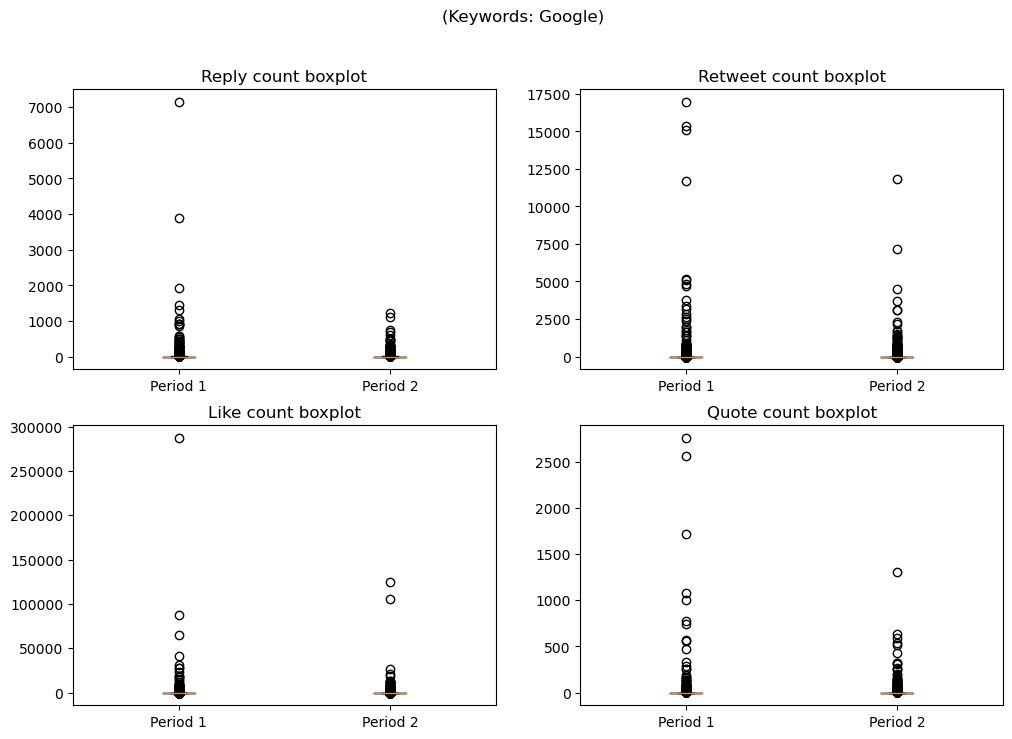

In [56]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# reply Count
axs[0, 0].boxplot([data_GO_period_1['replyCount'], data_GO_period_2['replyCount']])
axs[0, 0].set_xticklabels(['Period 1', 'Period 2'])
axs[0, 0].set_title('Reply count boxplot')

# retweet Count
axs[0, 1].boxplot([data_GO_period_1['retweetCount'], data_GO_period_2['retweetCount']])
axs[0, 1].set_xticklabels(['Period 1', 'Period 2'])
axs[0, 1].set_title('Retweet count boxplot')

# like Count
axs[1, 0].boxplot([data_GO_period_1['likeCount'], data_GO_period_2['likeCount']])
axs[1, 0].set_xticklabels(['Period 1', 'Period 2'])
axs[1, 0].set_title('Like count boxplot')

# quote Count
axs[1, 1].boxplot([data_GO_period_1['quoteCount'], data_GO_period_2['quoteCount']])
axs[1, 1].set_xticklabels(['Period 1', 'Period 2'])
axs[1, 1].set_title('Quote count boxplot')

fig.suptitle('(Keywords: Google)')
plt.show()


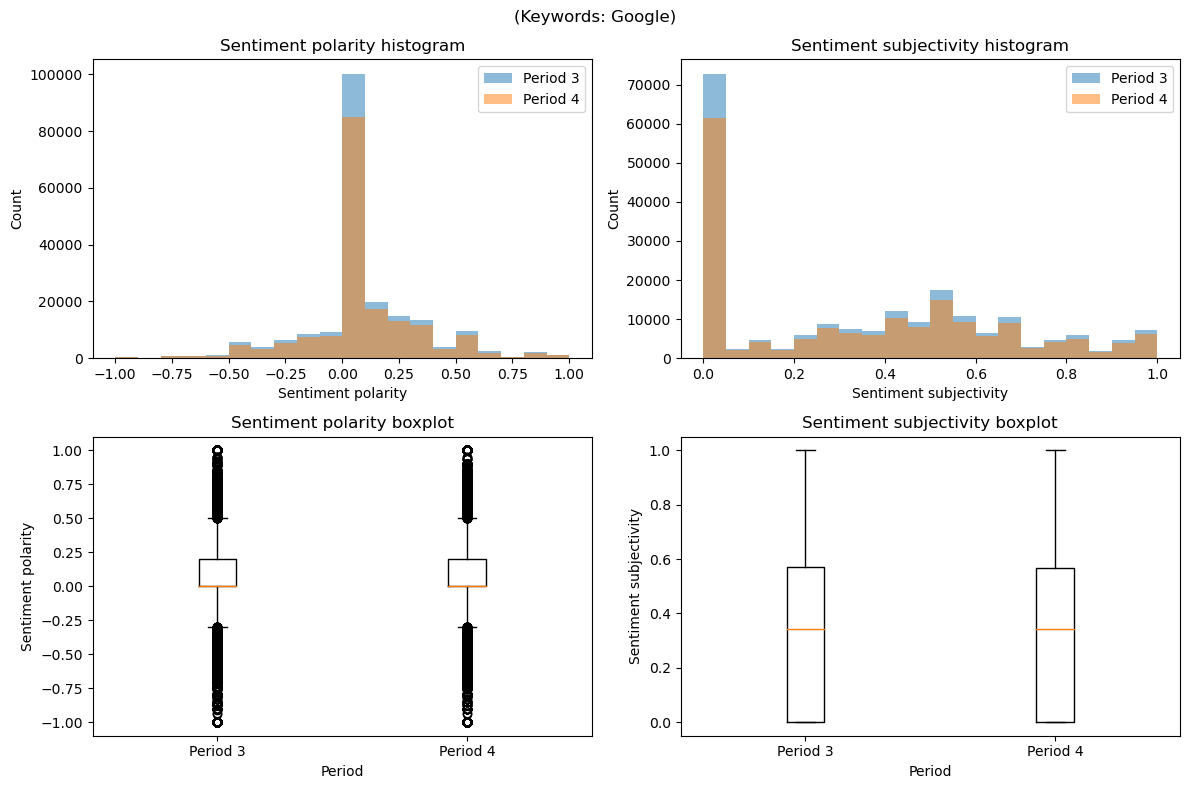

In [57]:
data_GO.sort_values('date', inplace=True)

data_GO_2 = data_GO[(data_GO['date'] >= '2023-03-19') & (data_GO['date'] <= '2023-03-29')]
data_GO_period_3 = data_GO_2[data_GO_2['date'] < '2023-03-24 05:34:31+00:00']
data_GO_period_4 = data_GO_2[data_GO_2['date'] >= '2023-03-24 05:34:31+00:00']

# Plot histograms of sentiment polarity and sentiment subjectivity
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(data_GO_period_3['sentiment_polarity'], bins=20, alpha=0.5, label='Period 3')
axs[0, 0].hist(data_GO_period_4['sentiment_polarity'], bins=20, alpha=0.5, label='Period 4')
axs[0, 0].legend()
axs[0, 0].set_xlabel('Sentiment polarity')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Sentiment polarity histogram')

axs[0, 1].hist(data_GO_period_3['sentiment_subjectivity'], bins=20, alpha=0.5, label='Period 3')
axs[0, 1].hist(data_GO_period_4['sentiment_subjectivity'], bins=20, alpha=0.5, label='Period 4')
axs[0, 1].legend()
axs[0, 1].set_xlabel('Sentiment subjectivity')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Sentiment subjectivity histogram')

# Plot boxtype of sentiment polarity and sentiment subjectivity
data_boxplot = [data_GO_period_3['sentiment_polarity'], data_GO_period_4['sentiment_polarity']]
axs[1, 0].boxplot(data_boxplot, labels=['Period 3', 'Period 4'])
axs[1, 0].set_xlabel('Period')
axs[1, 0].set_ylabel('Sentiment polarity')
axs[1, 0].set_title('Sentiment polarity boxplot')

data_boxplot = [data_GO_period_3['sentiment_subjectivity'], data_GO_period_4['sentiment_subjectivity']]
axs[1, 1].boxplot(data_boxplot, labels=['Period 3', 'Period 4'])
axs[1, 1].set_xlabel('Period')
axs[1, 1].set_ylabel('Sentiment subjectivity')
axs[1, 1].set_title('Sentiment subjectivity boxplot')

fig.suptitle('(Keywords: Google)')
plt.tight_layout()
plt.show()


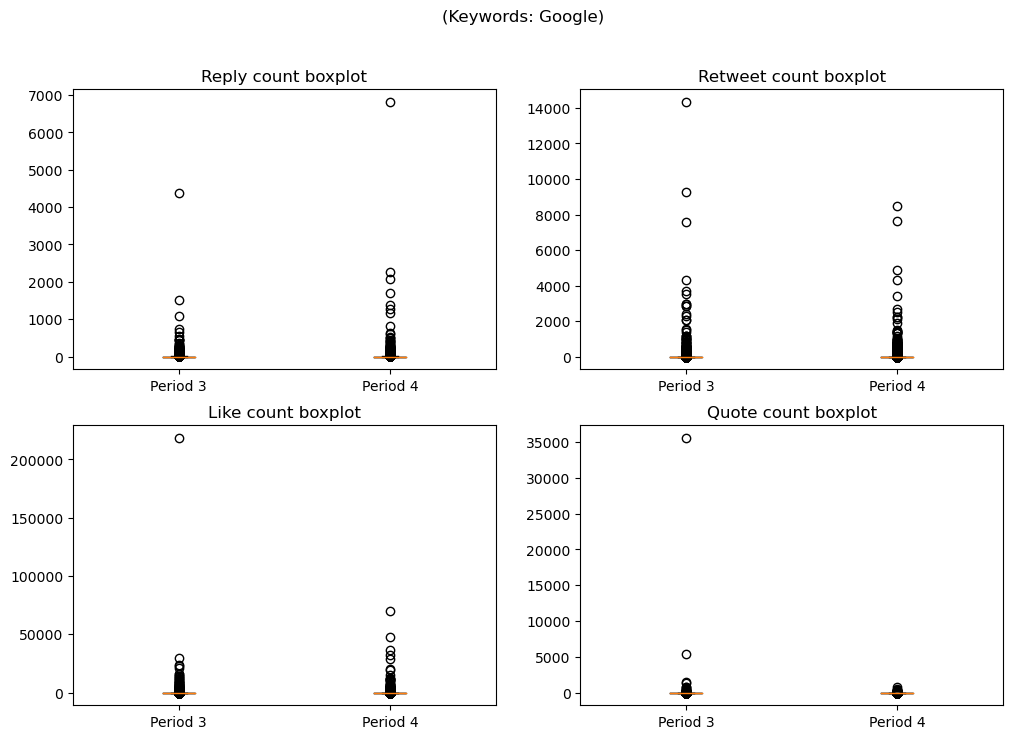

In [58]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].boxplot([data_GO_period_3['replyCount'], data_GO_period_4['replyCount']])
axs[0, 0].set_xticklabels(['Period 3', 'Period 4'])
axs[0, 0].set_title('Reply count boxplot')

axs[0, 1].boxplot([data_GO_period_3['retweetCount'], data_GO_period_4['retweetCount']])
axs[0, 1].set_xticklabels(['Period 3', 'Period 4'])
axs[0, 1].set_title('Retweet count boxplot')

axs[1, 0].boxplot([data_GO_period_3['likeCount'], data_GO_period_4['likeCount']])
axs[1, 0].set_xticklabels(['Period 3', 'Period 4'])
axs[1, 0].set_title('Like count boxplot')

axs[1, 1].boxplot([data_GO_period_3['quoteCount'], data_GO_period_4['quoteCount']])
axs[1, 1].set_xticklabels(['Period 3', 'Period 4'])
axs[1, 1].set_title('Quote count boxplot')

fig.suptitle('(Keywords: Google)')
plt.show()


In [59]:
# Run a sentiment analysis on each tweet
sentiment_scores_MI = []
for text in data_MI['text']:
    sentiment_score_MI = sentiment_analysis(text)
    sentiment_scores_MI.append(sentiment_score_MI)

# Add sentiment analysis results to the raw data table
data_MI['sentiment_polarity'] = [score[0] for score in sentiment_scores_MI]
data_MI['sentiment_subjectivity'] = [score[1] for score in sentiment_scores_MI]

# Print the sentiment analysis results
print(data_MI[['text', 'sentiment_polarity', 'sentiment_subjectivity']])



                                                     text  sentiment_polarity   
0       [call, expert, achievement, solitaire, collect...            0.000000  \
1       [’, rich, coming, national, broadcasting, comp...            0.375000   
2       [hell, conduct, survey, among, playstation, user]            0.000000   
3       [contraband, new, ip, multiplayer, ’, get, wro...            0.093534   
4       [im, amazed, strong, standing, tech, industry,...            0.248958   
...                                                   ...                 ...   
273023  [get, new, version, team, desktop, client, dep...            0.136364   
273024  [week, announced, rollout, new, desktop, clien...            0.136364   
273025  [roll, various, agent, assist, tool, read, lea...            0.000000   
273026  [install, powertoys, app, store, even, better,...            0.500000   
273027  [corp, launched, tool, help, professional, ide...            0.125000   

        sentiment_subjectiv

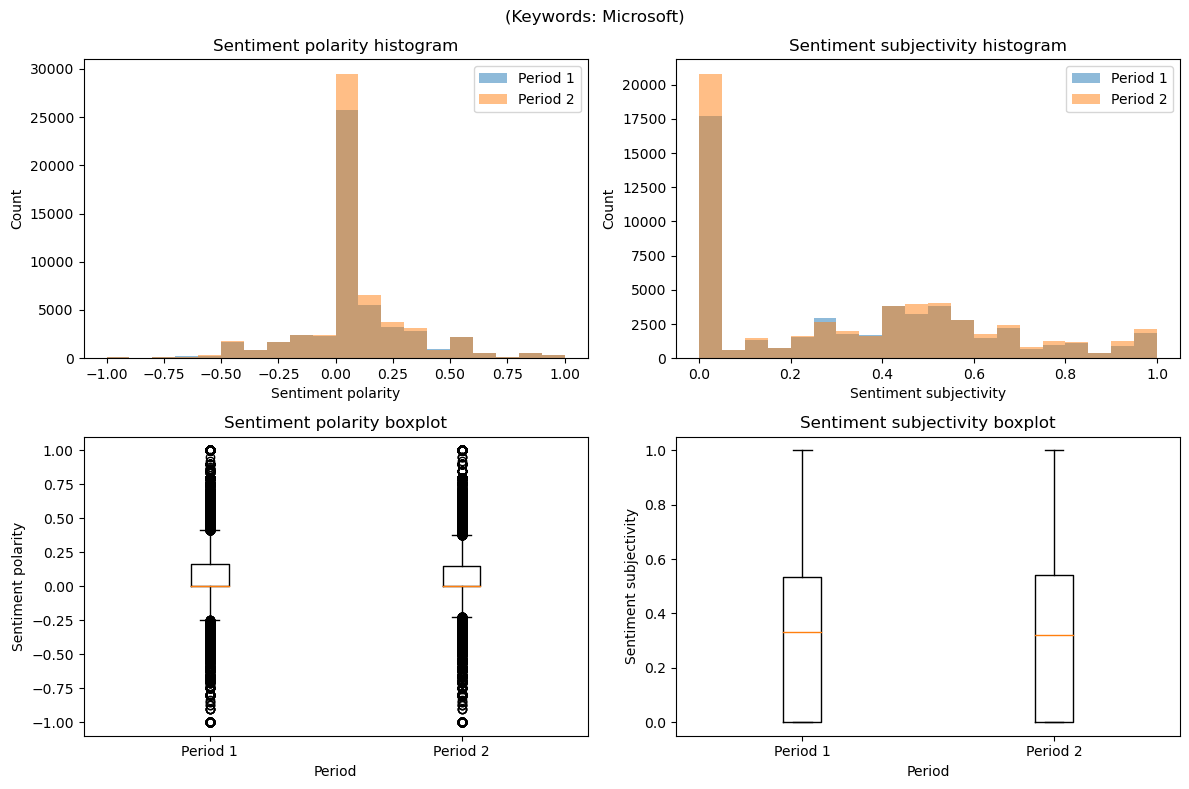

In [60]:
data_MI.sort_values('date', inplace=True)

data_MI_1 = data_MI[(data_MI['date'] >= '2023-03-09') & (data_MI['date'] <= '2023-03-19')]
data_MI_period_1 = data_MI_1[data_MI_1['date'] < '2023-03-14 17:00:33+00:00']
data_MI_period_2 = data_MI_1[data_MI_1['date'] >= '2023-03-14 17:00:33+00:00']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(data_MI_period_1['sentiment_polarity'], bins=20, alpha=0.5, label='Period 1')
axs[0, 0].hist(data_MI_period_2['sentiment_polarity'], bins=20, alpha=0.5, label='Period 2')
axs[0, 0].legend()
axs[0, 0].set_xlabel('Sentiment polarity')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Sentiment polarity histogram')

axs[0, 1].hist(data_MI_period_1['sentiment_subjectivity'], bins=20, alpha=0.5, label='Period 1')
axs[0, 1].hist(data_MI_period_2['sentiment_subjectivity'], bins=20, alpha=0.5, label='Period 2')
axs[0, 1].legend()
axs[0, 1].set_xlabel('Sentiment subjectivity')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Sentiment subjectivity histogram')

data_boxplot = [data_MI_period_1['sentiment_polarity'], data_MI_period_2['sentiment_polarity']]
axs[1, 0].boxplot(data_boxplot, labels=['Period 1', 'Period 2'])
axs[1, 0].set_xlabel('Period')
axs[1, 0].set_ylabel('Sentiment polarity')
axs[1, 0].set_title('Sentiment polarity boxplot')

data_boxplot = [data_MI_period_1['sentiment_subjectivity'], data_MI_period_2['sentiment_subjectivity']]
axs[1, 1].boxplot(data_boxplot, labels=['Period 1', 'Period 2'])
axs[1, 1].set_xlabel('Period')
axs[1, 1].set_ylabel('Sentiment subjectivity')
axs[1, 1].set_title('Sentiment subjectivity boxplot')

fig.suptitle('(Keywords: Microsoft)')
plt.tight_layout()
plt.show()



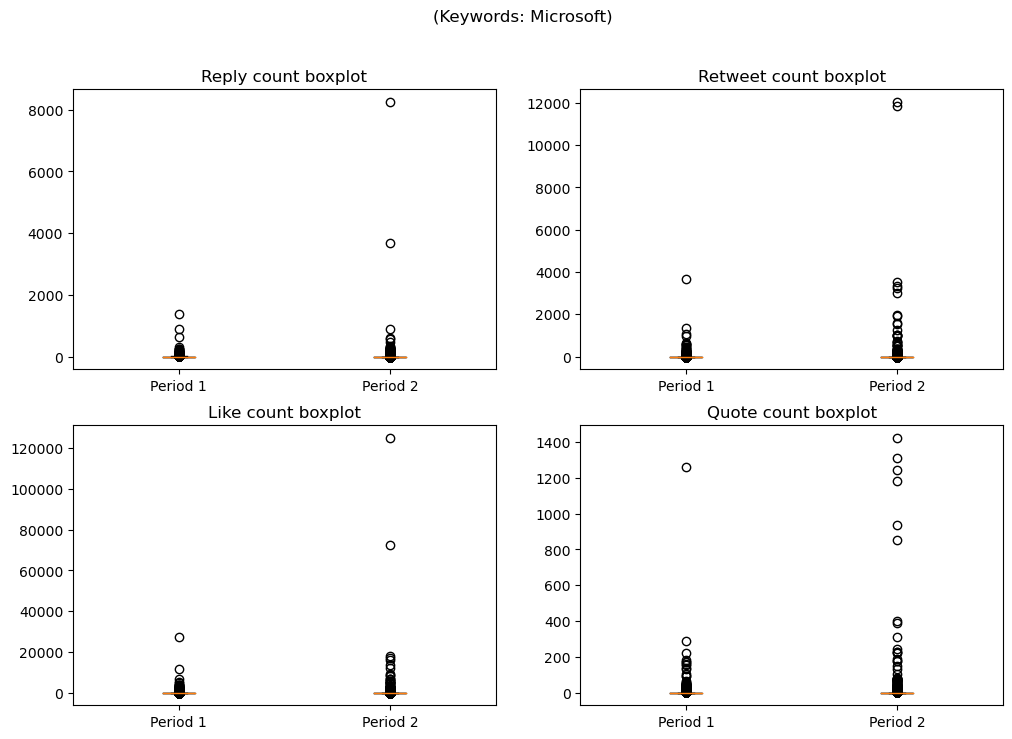

In [61]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].boxplot([data_MI_period_1['replyCount'], data_MI_period_2['replyCount']])
axs[0, 0].set_xticklabels(['Period 1', 'Period 2'])
axs[0, 0].set_title('Reply count boxplot')

axs[0, 1].boxplot([data_MI_period_1['retweetCount'], data_MI_period_2['retweetCount']])
axs[0, 1].set_xticklabels(['Period 1', 'Period 2'])
axs[0, 1].set_title('Retweet count boxplot')

axs[1, 0].boxplot([data_MI_period_1['likeCount'], data_MI_period_2['likeCount']])
axs[1, 0].set_xticklabels(['Period 1', 'Period 2'])
axs[1, 0].set_title('Like count boxplot')

axs[1, 1].boxplot([data_MI_period_1['quoteCount'], data_MI_period_2['quoteCount']])
axs[1, 1].set_xticklabels(['Period 1', 'Period 2'])
axs[1, 1].set_title('Quote count boxplot')

fig.suptitle('(Keywords: Microsoft)')
plt.show()


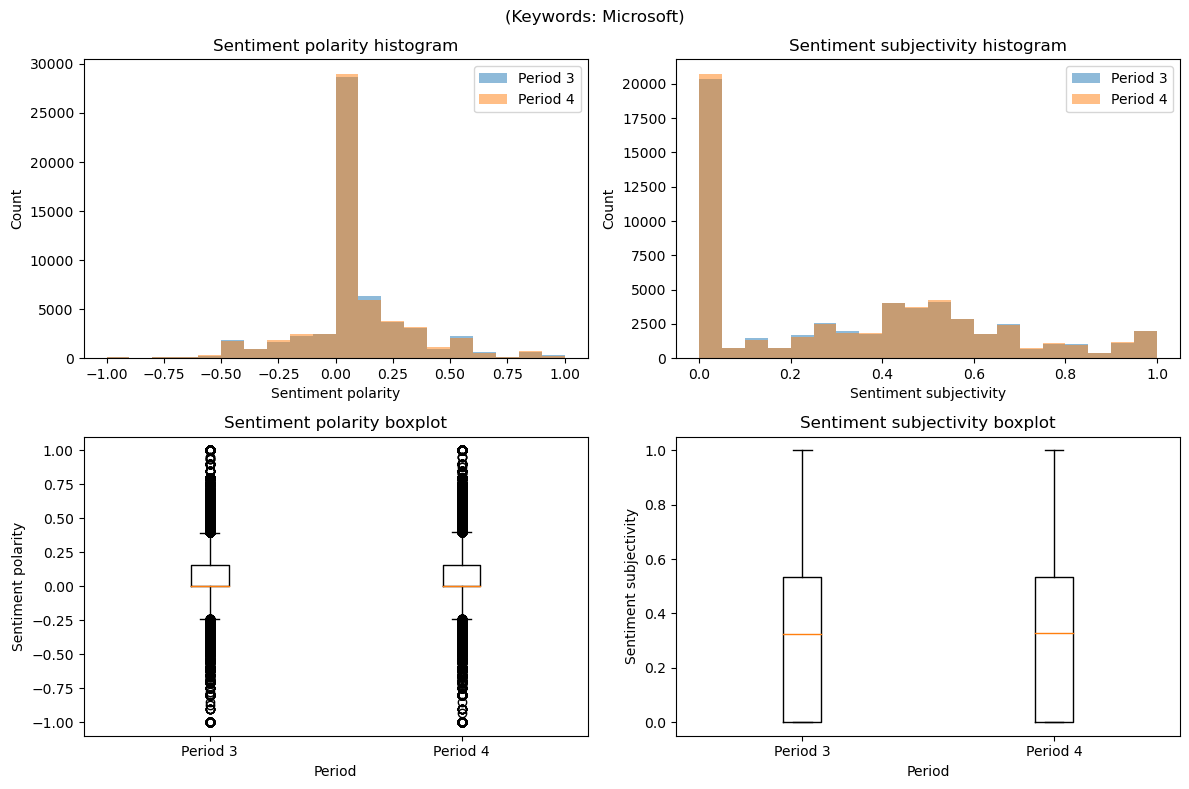

In [62]:
data_MI.sort_values('date', inplace=True)

data_MI_2 = data_MI[(data_MI['date'] >= '2023-03-19') & (data_MI['date'] <= '2023-03-29')]
data_MI_period_3 = data_MI_2[data_MI_2['date'] < '2023-03-24 05:34:31+00:00']
data_MI_period_4 = data_MI_2[data_MI_2['date'] >= '2023-03-24 05:34:31+00:00']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(data_MI_period_3['sentiment_polarity'], bins=20, alpha=0.5, label='Period 3')
axs[0, 0].hist(data_MI_period_4['sentiment_polarity'], bins=20, alpha=0.5, label='Period 4')
axs[0, 0].legend()
axs[0, 0].set_xlabel('Sentiment polarity')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_title('Sentiment polarity histogram')

axs[0, 1].hist(data_MI_period_3['sentiment_subjectivity'], bins=20, alpha=0.5, label='Period 3')
axs[0, 1].hist(data_MI_period_4['sentiment_subjectivity'], bins=20, alpha=0.5, label='Period 4')
axs[0, 1].legend()
axs[0, 1].set_xlabel('Sentiment subjectivity')
axs[0, 1].set_ylabel('Count')
axs[0, 1].set_title('Sentiment subjectivity histogram')

data_boxplot = [data_MI_period_3['sentiment_polarity'], data_MI_period_4['sentiment_polarity']]
axs[1, 0].boxplot(data_boxplot, labels=['Period 3', 'Period 4'])
axs[1, 0].set_xlabel('Period')
axs[1, 0].set_ylabel('Sentiment polarity')
axs[1, 0].set_title('Sentiment polarity boxplot')

data_boxplot = [data_MI_period_3['sentiment_subjectivity'], data_MI_period_4['sentiment_subjectivity']]
axs[1, 1].boxplot(data_boxplot, labels=['Period 3', 'Period 4'])
axs[1, 1].set_xlabel('Period')
axs[1, 1].set_ylabel('Sentiment subjectivity')
axs[1, 1].set_title('Sentiment subjectivity boxplot')

fig.suptitle('(Keywords: Microsoft)')
plt.tight_layout()
plt.show()


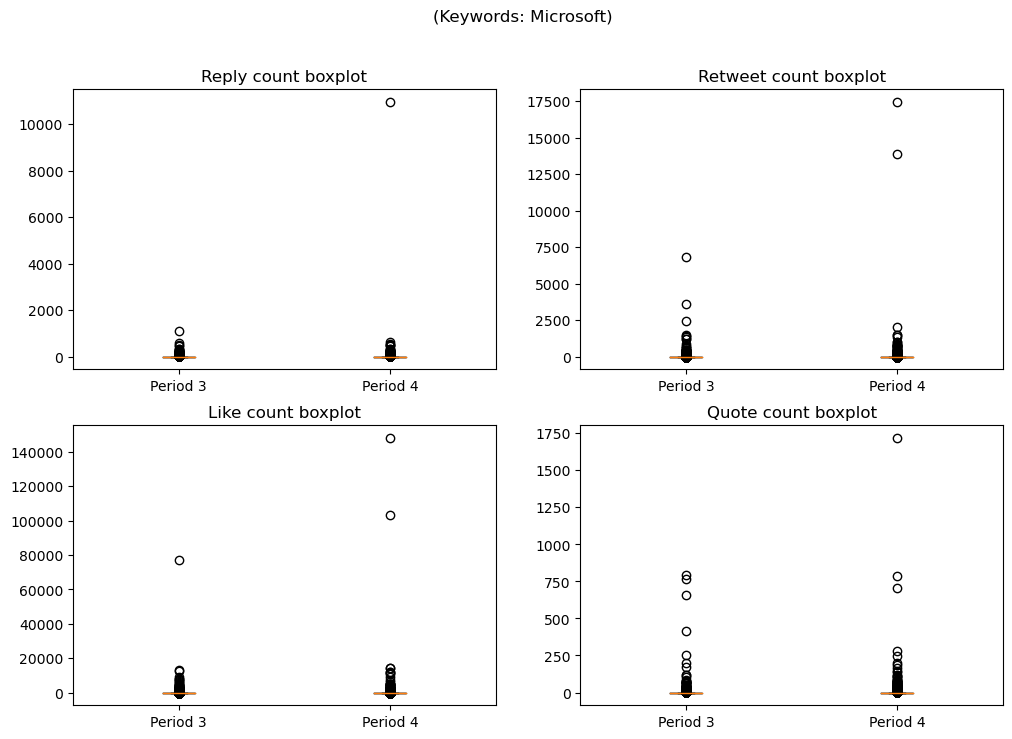

In [63]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

axs[0, 0].boxplot([data_MI_period_3['replyCount'], data_MI_period_4['replyCount']])
axs[0, 0].set_xticklabels(['Period 3', 'Period 4'])
axs[0, 0].set_title('Reply count boxplot')

axs[0, 1].boxplot([data_MI_period_3['retweetCount'], data_MI_period_4['retweetCount']])
axs[0, 1].set_xticklabels(['Period 3', 'Period 4'])
axs[0, 1].set_title('Retweet count boxplot')

axs[1, 0].boxplot([data_MI_period_3['likeCount'], data_MI_period_4['likeCount']])
axs[1, 0].set_xticklabels(['Period 3', 'Period 4'])
axs[1, 0].set_title('Like count boxplot')

axs[1, 1].boxplot([data_MI_period_3['quoteCount'], data_MI_period_4['quoteCount']])
axs[1, 1].set_xticklabels(['Period 3', 'Period 4'])
axs[1, 1].set_title('Quote count boxplot')

fig.suptitle('(Keywords: Microsoft)')
plt.show()


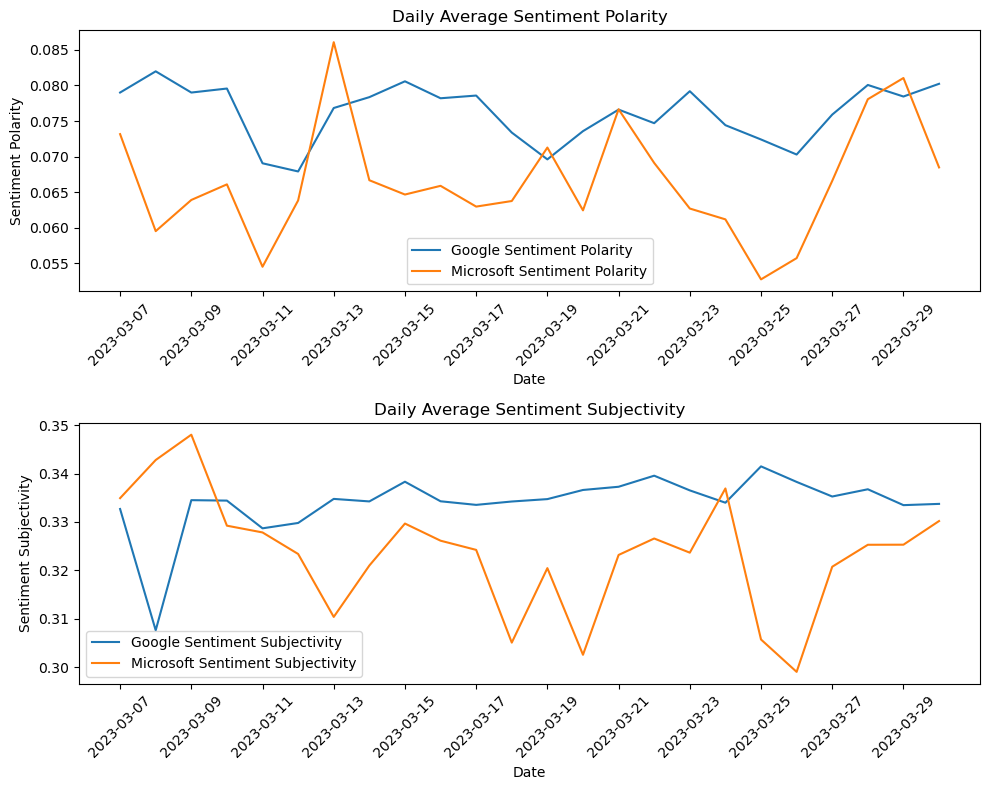

In [64]:
data_GO['date'] = pd.to_datetime(data_GO['date'], utc=True)
data_MI['date'] = pd.to_datetime(data_MI['date'], utc=True)

GO_sentiment_by_day = data_GO.groupby(pd.Grouper(key='date', freq='D')).agg({'sentiment_polarity': 'mean', 'sentiment_subjectivity': 'mean'})
MI_sentiment_by_day = data_MI.groupby(pd.Grouper(key='date', freq='D')).agg({'sentiment_polarity': 'mean', 'sentiment_subjectivity': 'mean'})

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

ax1.plot(GO_sentiment_by_day.index, GO_sentiment_by_day['sentiment_polarity'], label='Google Sentiment Polarity')
ax1.plot(MI_sentiment_by_day.index, MI_sentiment_by_day['sentiment_polarity'], label='Microsoft Sentiment Polarity')
ax1.legend()
ax1.set_xticks(GO_sentiment_by_day.index[::2]) 
ax1.set_xticklabels(GO_sentiment_by_day.index.strftime('%Y-%m-%d')[::2], rotation=45) 
ax1.set_title('Daily Average Sentiment Polarity')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Polarity')


ax2.plot(GO_sentiment_by_day.index, GO_sentiment_by_day['sentiment_subjectivity'], label='Google Sentiment Subjectivity')
ax2.plot(MI_sentiment_by_day.index, MI_sentiment_by_day['sentiment_subjectivity'], label='Microsoft Sentiment Subjectivity')
ax2.legend()
ax2.set_xticks(GO_sentiment_by_day.index[::2]) # 在这里设置xticks
ax2.set_xticklabels(GO_sentiment_by_day.index.strftime('%Y-%m-%d')[::2], rotation=45) 
ax2.set_title('Daily Average Sentiment Subjectivity')
ax2.set_xlabel('Date')
ax2.set_ylabel('Sentiment Subjectivity')

plt.tight_layout()
plt.show()



## Topic Modeling <a class="anchor" id="4.3"></a>

In [65]:
vectorizer_go = TfidfVectorizer()
X_go = vectorizer_go.fit_transform(data_GO['text'].apply(lambda x: ' '.join(x)))

# Convert to the format required by gensim
corpus_go = gensim.matutils.Sparse2Corpus(X_go, documents_columns=False)
id2word_go = dict((v, k) for k, v in vectorizer_go.vocabulary_.items())
dictionary_go = gensim.corpora.dictionary.Dictionary.from_corpus(corpus_go, id2word=id2word_go)


In [66]:
def compute_coherence_values(dictionary, corpus, texts, limit):
    """
    Compute coherence values for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(2, 10, 1):
        model = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=0)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    return model_list, coherence_values


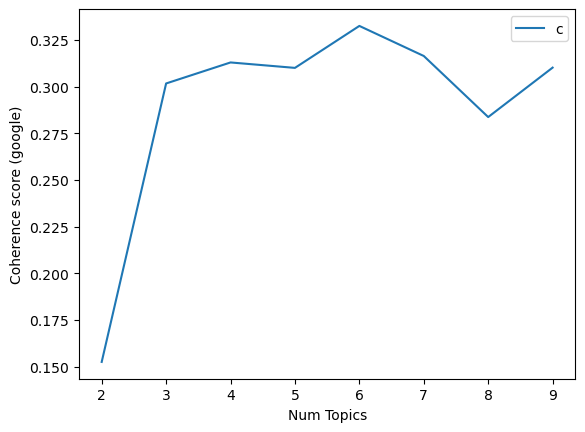

Best number of topics: 6


In [67]:
# Compute coherence values for various number of topics
model_list_go, coherence_values_go = compute_coherence_values(dictionary=dictionary_go, corpus=corpus_go, 
                                                              texts=data_GO['text'], limit = 10)

# Plot coherence values vs number of topics
x = range(2, 10, 1)
plt.plot(x, coherence_values_go)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score (google)")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Find the number of topics with the highest coherence score
best_num_topics_go = x[np.argmax(coherence_values_go)]
print("Best number of topics:", best_num_topics_go)


In [68]:
# topic modeling
lda_model_google = LdaModel(corpus=corpus_go, id2word=dictionary_go, 
                            num_topics = best_num_topics_go, random_state = 0)


In [69]:
# Output the top 10 high-frequency words for each topic
for topic,words in lda_model_google.show_topics(num_topics=10, num_words=6):
    print('Topic id: ', topic+1)
    print('Top words:',words)
    print()
    

Topic id:  1
Top words: 0.022*"bard" + 0.009*"chat" + 0.007*"bro" + 0.006*"chatgpt" + 0.005*"say" + 0.005*"openai"

Topic id:  2
Top words: 0.007*"report" + 0.005*"ready" + 0.005*"radio" + 0.005*"ask" + 0.005*"play" + 0.004*"da"

Topic id:  3
Top words: 0.009*"search" + 0.008*"know" + 0.007*"like" + 0.006*"use" + 0.005*"one" + 0.005*"dont"

Topic id:  4
Top words: 0.018*"play" + 0.017*"store" + 0.015*"app" + 0.008*"pixel" + 0.008*"free" + 0.008*"apple"

Topic id:  5
Top words: 0.008*"cloud" + 0.008*"ad" + 0.008*"new" + 0.008*"ai" + 0.005*"business" + 0.005*"search"

Topic id:  6
Top words: 0.008*"friend" + 0.008*"gun" + 0.006*"court" + 0.005*"anticompetitive" + 0.005*"shooting" + 0.005*"according"



In [70]:
vis_data_go = pyLDAvis.gensim_models.prepare(lda_model_google, corpus_go, dictionary_go, 
                                             mds='tsne', sort_topics=False)
#pyLDAvis.save_html(vis_data_go,'google_topic.html')
pyLDAvis.display(vis_data_go)
# In order to ensure the visualization, I have illustrated a screenshot of the result below, which is not dynamic
# (If you can see the results from pyLDAvis.display, please ignore the following images)

<img src="google_topic.png" style="width:95%; clear:both; margin-bottom:-20px" align=left>

## Topic Over Time <a class="anchor" id="4.4"></a>

In [71]:
topics_go = lda_model_google[corpus_go]
topic_words_go = lda_model_google.show_topics(num_topics=best_num_topics_go, num_words=6, formatted=False)

# Add the topic weights to the data_GO table
data_GO['topics'] = [doc for doc in topics_go]

#Add topic_id and top10 words to the data_GO table
topic_ids_go = []
top6_words_go = []
for doc_topics_go in topics_go:
    topic_dist_go = [topic[1] for topic in doc_topics_go]
    topic_id_go = np.argmax(topic_dist_go)
    top_words_go = [word[0] for word in sorted(topic_words_go[topic_id_go][1], key=lambda x: x[1], reverse=True)]
    topic_ids_go.append(topic_id_go + 1)
    top6_words_go.append(top_words_go)

data_GO['topic_id'] = topic_ids_go
data_GO['topic_words'] = top6_words_go


In [72]:
data_GO['days'] = data_GO['date'].dt.day.astype(int)
df1_go = data_GO.groupby(['days', 'topic_id'])['text'].count().reset_index(name='count')
df2_go = data_GO[['topic_id', 'topic_words']]
df3_go = df1_go.merge(df2_go,on='topic_id',how='left')
df3_go = df3_go.drop_duplicates(subset=['days', 'topic_id'])
df3_go['topic_words'] = df3_go['topic_words'].map(lambda x: ', '.join(x))


Text(0.5, 0.98, '(Keywords: Google)')

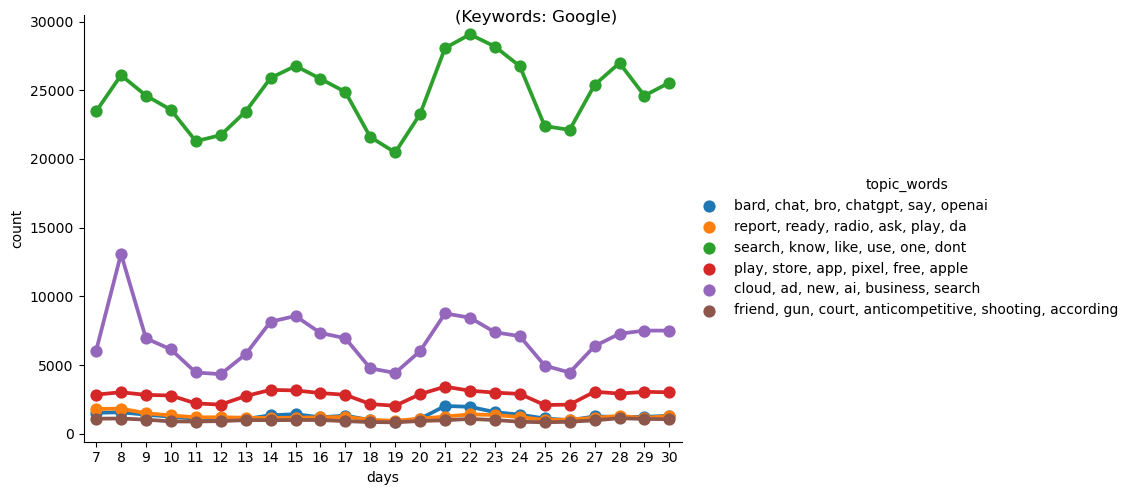

In [73]:
# topic over time
p = sns.factorplot(x='days', y='count', kind='point', hue='topic_words', data=df3_go, size=5, aspect=1.5)
p.fig.suptitle('(Keywords: Google)')


In [74]:
vectorizer_mi = TfidfVectorizer()
X_mi = vectorizer_mi.fit_transform(data_MI['text'].apply(lambda x: ' '.join(x)))

corpus_mi = gensim.matutils.Sparse2Corpus(X_mi, documents_columns=False)
id2word_mi = dict((v, k) for k, v in vectorizer_mi.vocabulary_.items())
dictionary_mi = gensim.corpora.dictionary.Dictionary.from_corpus(corpus_mi, id2word=id2word_mi)


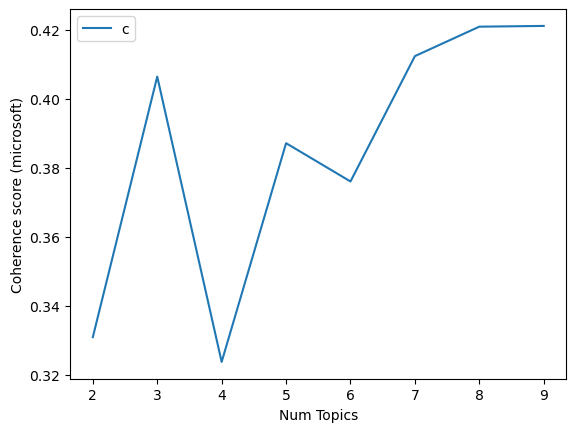

Best number of topics: 9


In [75]:
model_list_mi, coherence_values_mi = compute_coherence_values(dictionary=dictionary_mi, corpus=corpus_mi, 
                                                              texts=data_MI['text'], limit = 10)

# Plot coherence values vs number of topics
x = range(2, 10, 1)
plt.plot(x, coherence_values_mi)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score (microsoft)")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Find the number of topics with the highest coherence score
best_num_topics_mi = x[np.argmax(coherence_values_mi)]
print("Best number of topics:", best_num_topics_mi)


In [76]:
lda_model_microsoft = LdaModel(corpus=corpus_mi, id2word=dictionary_mi, 
                               num_topics = best_num_topics_mi, random_state = 0)


In [77]:
# Output the top 10 high-frequency words for each topic
for topic, words in lda_model_microsoft.show_topics(num_topics=10, num_words=6):
    print('Topic id: ', topic+1)
    print('Top words:',words)
    print()
    

Topic id:  1
Top words: 0.016*"sony" + 0.013*"game" + 0.010*"xbox" + 0.010*"like" + 0.008*"nintendo" + 0.007*"one"

Topic id:  2
Top words: 0.011*"rule" + 0.010*"gmail" + 0.009*"tuesday" + 0.008*"explores" + 0.008*"researcher" + 0.007*"powered"

Topic id:  3
Top words: 0.022*"security" + 0.016*"copilot" + 0.012*"new" + 0.011*"team" + 0.011*"ai" + 0.011*"azure"

Topic id:  4
Top words: 0.019*"leader" + 0.017*"cloud" + 0.017*"defender" + 0.016*"threat" + 0.015*"value" + 0.015*"fear"

Topic id:  5
Top words: 0.020*"japan" + 0.013*"pilot" + 0.010*"dead" + 0.009*"pc" + 0.009*"controller" + 0.007*"arc"

Topic id:  6
Top words: 0.013*"gpt" + 0.010*"practice" + 0.008*"anticompetitive" + 0.007*"podcast" + 0.007*"anyway" + 0.006*"apple"

Topic id:  7
Top words: 0.008*"edge" + 0.007*"team" + 0.006*"window" + 0.006*"office" + 0.005*"account" + 0.005*"use"

Topic id:  8
Top words: 0.012*"api" + 0.012*"introduces" + 0.011*"metaverse" + 0.009*"bard" + 0.009*"disney" + 0.008*"congress"

Topic id:  9
T

In [78]:
pyLDAvis.enable_notebook()

vis_data_mi = pyLDAvis.gensim_models.prepare(lda_model_microsoft, corpus_mi, dictionary_mi, 
                                             mds='tsne', sort_topics=False)
#pyLDAvis.save_html(vis_data_mi,'microsoft_topic.html')
pyLDAvis.display(vis_data_mi)
# In order to ensure the visualization, I have illustrated a screenshot of the result below, which is not dynamic
# (If you can see the results from pyLDAvis.display, please ignore the following images)

<img src="microsoft_topic.png" style="width:95%; clear:both; margin-bottom:-20px" align=left>

In [79]:
topics_mi = lda_model_microsoft[corpus_mi]
topic_words_mi = lda_model_microsoft.show_topics(num_topics=best_num_topics_mi, num_words=6, formatted=False)

# Add the topic weights to the data_MI table
data_MI['topics'] = [doc for doc in topics_mi]

#Add topic_id and top10 words to the data_MI table
topic_ids_mi = []
top6_words_mi = []
for doc_topics_mi in topics_mi:
    topic_dist_mi = [topic[1] for topic in doc_topics_mi]
    topic_id_mi = np.argmax(topic_dist_mi)
    top_words_mi = [word[0] for word in sorted(topic_words_mi[topic_id_mi][1], key=lambda x: x[1], reverse=True)]
    topic_ids_mi.append(topic_id_mi + 1)
    top6_words_mi.append(top_words_mi)     

data_MI['topic_id'] = topic_ids_mi
data_MI['topic_words'] = top6_words_mi


In [80]:
data_MI['days'] = data_MI['date'].dt.day.astype(int)
df1_mi = data_MI.groupby(['days', 'topic_id'])['text'].count().reset_index(name='count')
df2_mi = data_MI[['topic_id', 'topic_words']]
df3_mi = df1_mi.merge(df2_mi,on='topic_id',how='left')
df3_mi = df3_mi.drop_duplicates(subset=['days', 'topic_id'])
df3_mi['topic_words'] = df3_mi['topic_words'].map(lambda x: ', '.join(x))


Text(0.5, 0.98, '(Keywords: Microsoft)')

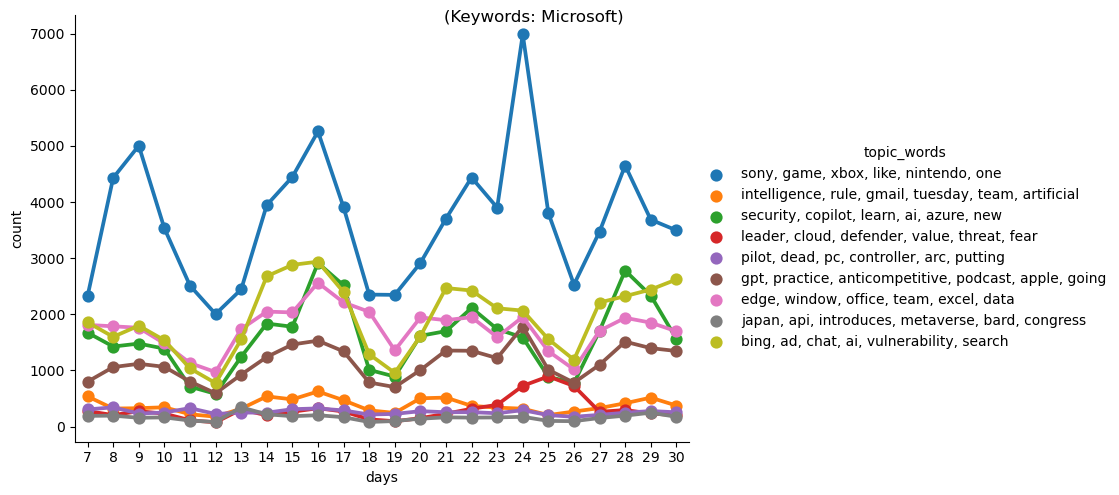

In [81]:
# topic over time
q = sns.factorplot(x='days', y='count', kind='point', hue='topic_words', data=df3_mi, size=5, aspect=1.5)
q.fig.suptitle('(Keywords: Microsoft)')



## Wordcloud <a class="anchor" id="4.5"></a>

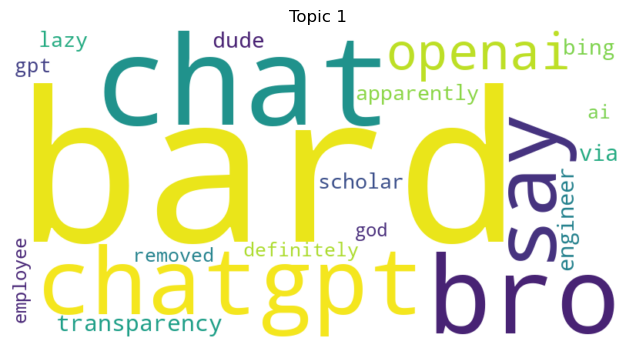

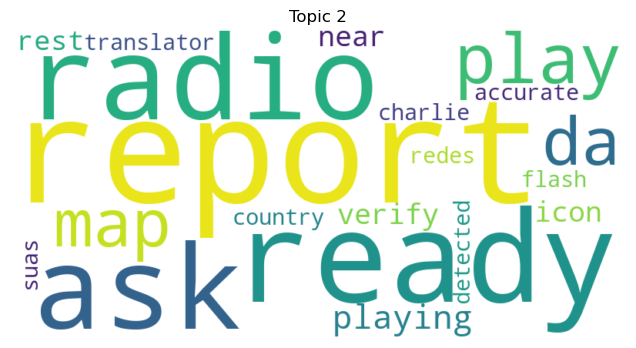

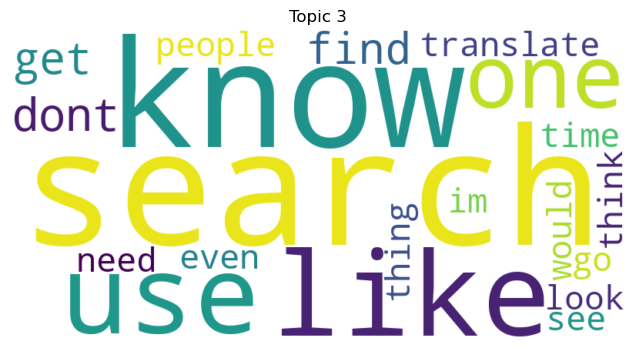

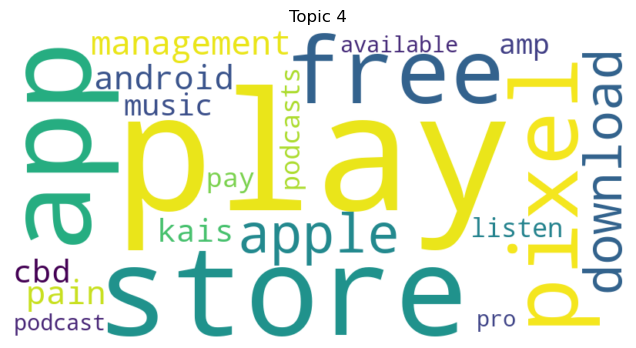

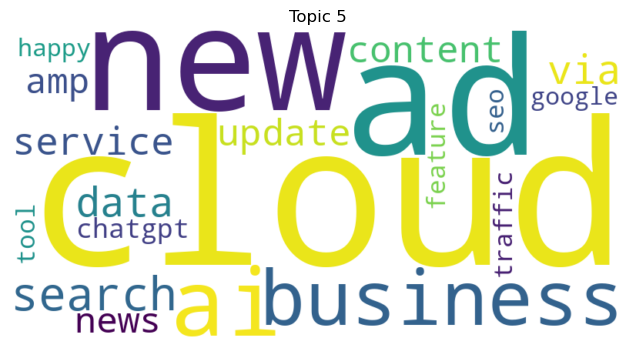

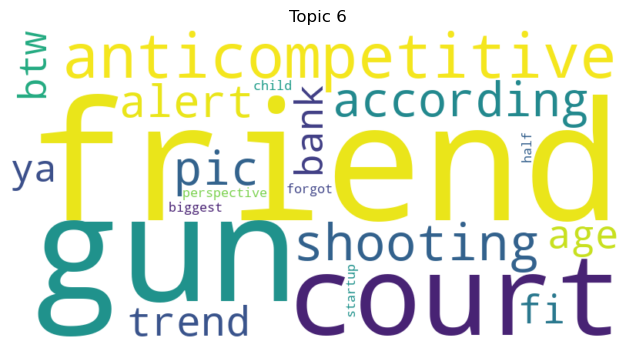

In [82]:
topic_words_google = lda_model_google.show_topics(num_topics=10, num_words=20, formatted=False)

# Iterate through each topic to generate word clouds
for i, topic in enumerate(topic_words_google):
    # Converts the words and weights in the topic into dictionary format
    word_weights = {word: weight for word, weight in topic[1]}
    # Generating word cloud
    wc = WordCloud(width=800, height=400, background_color='white', random_state = 0).generate_from_frequencies(word_weights)

    # plot word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i+1}')
    plt.show()
  

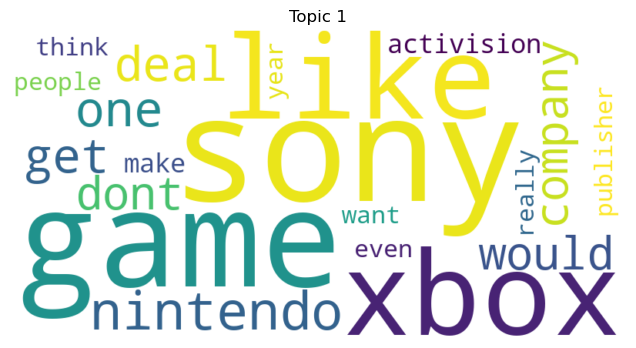

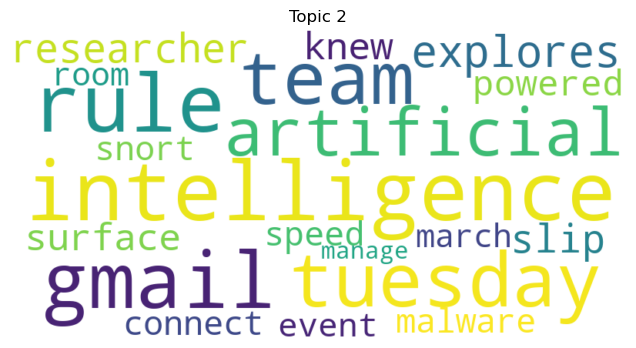

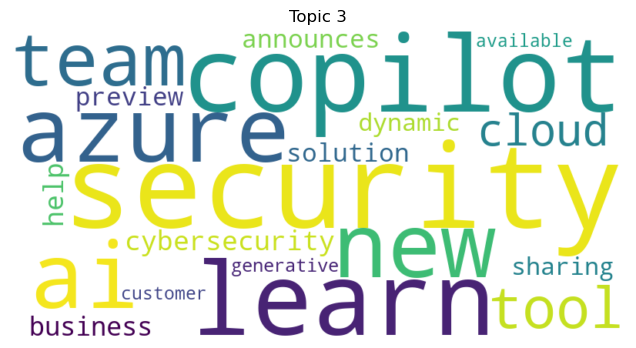

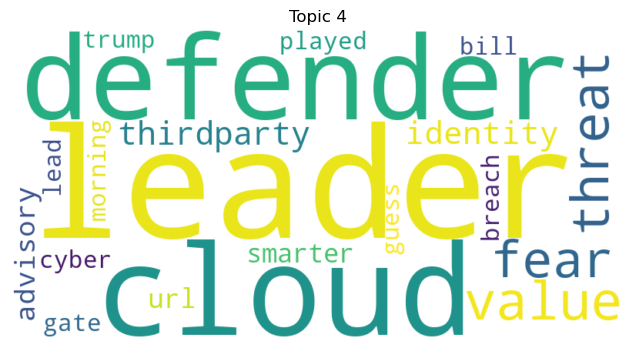

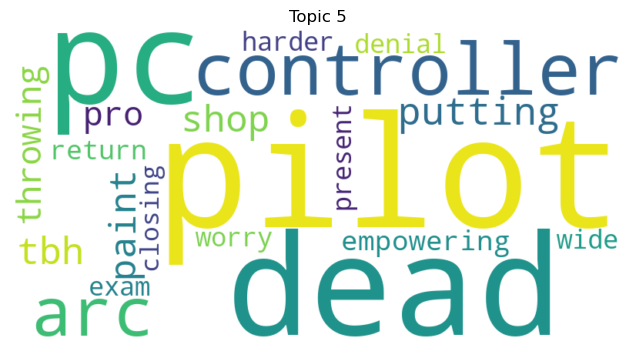

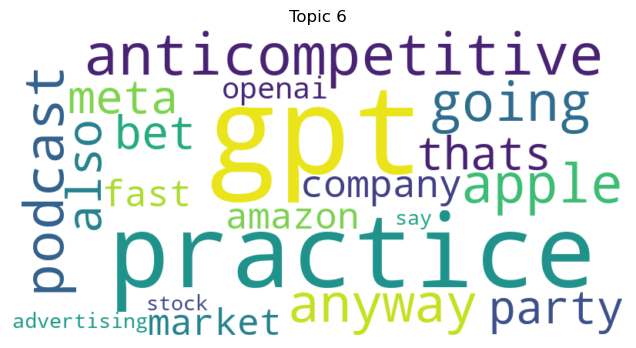

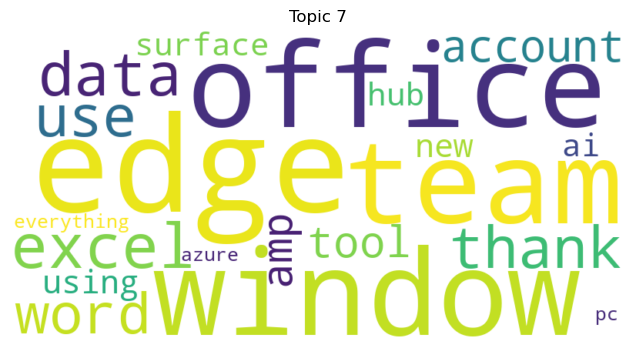

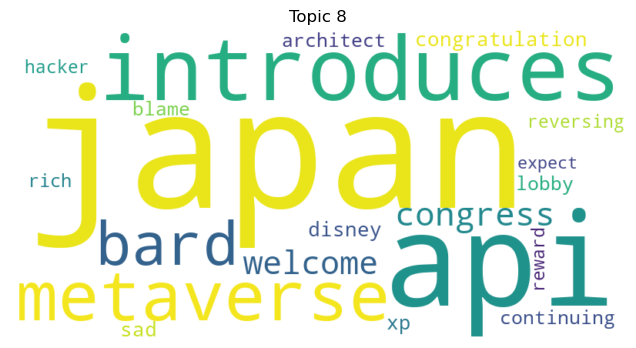

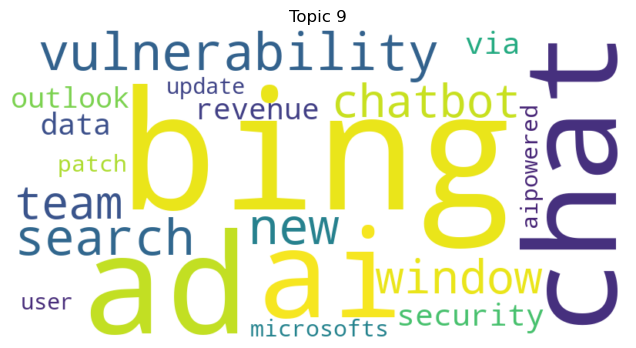

In [83]:
topic_words_microsoft = lda_model_microsoft.show_topics(num_topics=10, num_words=20, formatted=False)

# Iterate through each topic to generate word clouds
for i, topic in enumerate(topic_words_microsoft):
    # Converts the words and weights in the topic into dictionary format
    word_weights = {word: weight for word, weight in topic[1]}
    # Generating word cloud
    wc = WordCloud(width=800, height=400, background_color='white', random_state = 0).generate_from_frequencies(word_weights)
    # plot word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i+1}')
    plt.show()
    

## Tweets in order of Prevalence index <a class="anchor" id="4.6"></a>

In [84]:
# calculate Prevalence index
data_GO['Prevalence index'] = data_GO['replyCount'] + data_GO['retweetCount'] + data_GO['likeCount'] + data_GO['quoteCount']
data_MI['Prevalence index'] = data_MI['replyCount'] + data_MI['retweetCount'] + data_MI['likeCount'] + data_MI['quoteCount']


In [85]:
# Find the top ten documents with the highest 'Prevalence index' on each topic
top_docs_go = data_GO.groupby('topic_id')['Prevalence index'].nlargest(10)

# Get the index of each document
doc_indices_go = top_docs_go.index.get_level_values(1)

# Select the columns to display
selected_cols = ['date', 'rawContent','sentiment_polarity']
result_google = data_GO.loc[doc_indices_go, selected_cols + ['topic_id', 'Prevalence index']]

# Rank results by topic id and Prevalence index
result_google = result_google.sort_values(['topic_id', 'Prevalence index'], ascending=[True, False])

# print result
#result_google.to_csv('result_google.csv')
result_google


,date,rawContent,sentiment_polarity,topic_id,Prevalence index
551927,2023-03-21 08:06:25+00:00,should i google it https://t.co/sxsBU3P3g2,0.000000,1,14376.0
332059,2023-03-15 06:34:19+00:00,@urmaker69 @davenewworld_2 Is your google brok...,-0.325000,1,12326.0
97983,2023-03-09 16:22:53+00:00,me: why does my chest hurt?\n\ngoogle: https:/...,0.000000,1,11065.0
11148,2023-03-07 17:59:56+00:00,They said Nicki paused after Christopher Reeve...,0.000000,1,8263.0
611249,2023-03-23 21:41:25+00:00,me praying for rich swifties to show up to era...,0.075000,1,6630.0
691768,2023-03-25 22:48:51+00:00,it’s crazy how in google statistics you can se...,-0.183333,1,4672.0
448523,2023-03-18 02:12:37+00:00,@cordelll bro copy pasted the first apology on...,0.250000,1,4568.0
710388,2023-03-25 10:45:12+00:00,google how to have a bro in my life again 🫠\n\...,0.000000,1,4295.0
776343,2023-03-27 13:26:37+00:00,ChatGPT vs Google bard https://t.co/V6rGkIcmmP,0.000000,1,4255.0
596707,2023-03-22 06:22:16+00:00,转：分享一个用GPT4查文献的方法。\n之前大家都吐槽Chatgpt会给生成假文献，我也遇到...,0.000000,1,3881.0


In [86]:
# Find the top ten documents with the highest 'Prevalence index' on each topic
top_docs_mi = data_MI.groupby('topic_id')['Prevalence index'].nlargest(10)

# Get the index of each document
doc_indices_mi = top_docs_mi.index.get_level_values(1)

# Select the columns to display
selected_cols = ['date', 'rawContent','sentiment_polarity']
result_microsoft = data_MI.loc[doc_indices_mi, selected_cols + ['topic_id', 'Prevalence index']]

# Rank results by topic id and Prevalence index
result_microsoft = result_microsoft.sort_values(['topic_id', 'Prevalence index'], ascending=[True, False])

# print result
#result_microsoft.to_csv('result_microsoft.csv')
result_microsoft


,date,rawContent,sentiment_polarity,topic_id,Prevalence index
202298,2023-03-24 05:34:31+00:00,"As part of their investment, Microsoft gained ...",0.000000,1,178179.0
110598,2023-03-16 00:29:27+00:00,Microsoft fired their AI safety team?\nhttps:/...,0.000000,1,94056.0
198455,2023-03-24 12:19:24+00:00,BREAKING: the UK's CMA has provisionally concl...,-0.500000,1,17827.0
11130,2023-03-08 22:27:05+00:00,MICROSOFT AND GOOGLE STOCKS NOW\n\nDO NOT SELL...,0.300000,1,12206.0
216444,2023-03-26 17:58:48+00:00,Microsoft: We have world class AI research\nGo...,-0.116667,1,11964.0
...,...,...,...,...,...
120930,2023-03-17 07:06:08+00:00,"ChatGPT's latest version, GPT-4, is now availa...",0.340000,9,8224.0
155515,2023-03-21 16:32:11+00:00,Just tried AI-powered Microsoft Word.\n\nIt's ...,0.078788,9,7955.0
37514,2023-03-10 17:27:17+00:00,"*If* GPT-4 is multimodal, we can predict with ...",0.080000,9,6436.0
140029,2023-03-20 23:40:44+00:00,Microsoft just announced its Notion competitor...,0.500000,9,5215.0
